Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(f'Размерность тренировочного датасета: {df_train.shape}')
print(f'Размерность тестового датасета: {df_test.shape}')

Размерность тренировочного датасета: (200000, 202)
Размерность тестового датасета: (200000, 201)


In [5]:
# Признаки
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [6]:
df_train.head(10)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5  train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6  train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7  train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8  train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9  train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   

    var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   
5  4.5322  15.2255  ...  -6.3068   6.6025   5.2912   0.4403  14.9452   1.0314   
6  6.1961  12.0771  ...   8.7830   6.4521   3.5325   0.1777  18.3314   0.5845   
7  5.6890  22.3262  ...  13.1700   6.5491   3.9906   5.8061  23.1407  -0.3776   
8  4.4514  10.1854  ...   1.4298  14.7510   1.6395   1.4181  14.8370  -1.9940   
9  6.0637  16.8410  ...   0.5543   6.3160   1.0371   3.6885  14.8344   0.4467   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  
5  -3.6241   9.7670  12.5809  -4.7602  
6   9.1104   9.1143  10.8869  -3.2097  
7   4.2178   9.4237   8.6624   3.4806  
8  -1.0733   8.1975  19.5114   4.8453  
9  14.1287   7.9133  16.2375  14.2514  

[10 rows x 202 columns]

In [12]:
# Общие статистики
with pd.option_context('display.max_columns', 201):
    print(df_train.describe())

              target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.8831

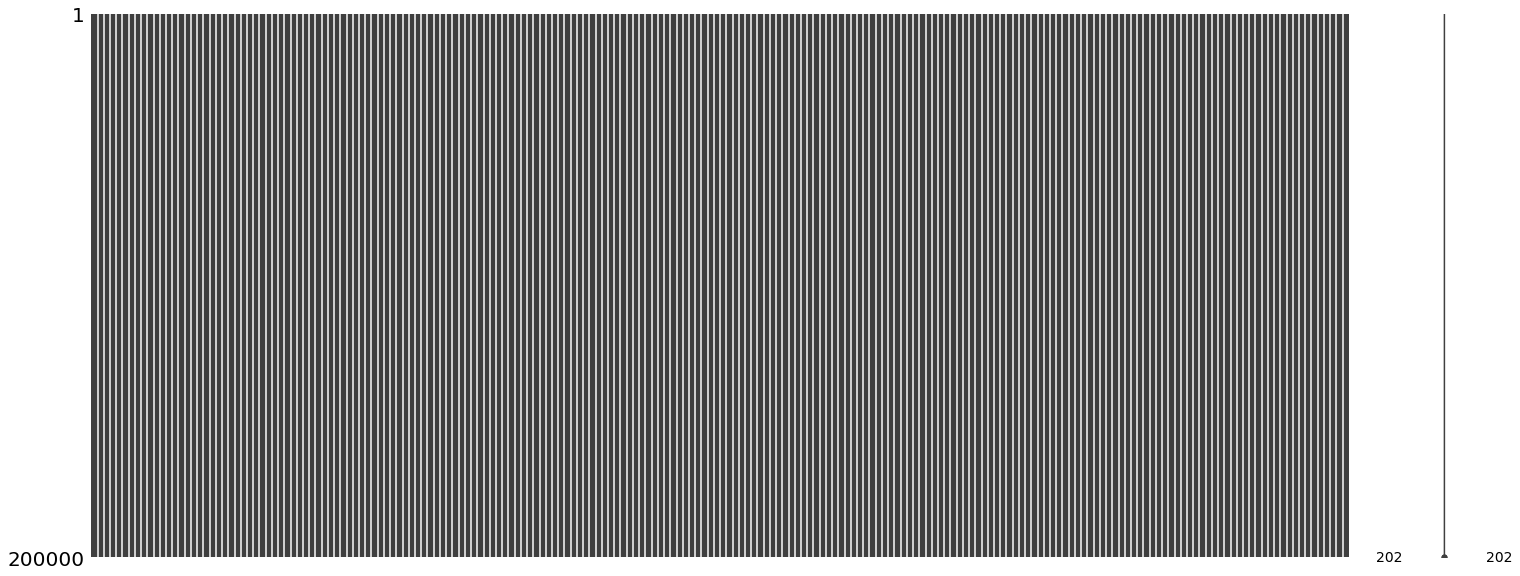

In [21]:
msno.matrix(df_train)

Набор тренировочных данных содержит 200 признаков и 200000 наблюдений, плюс идентификатор и целевой параметр. Все признаки являются неприрывными, а целевое значение скорее всег меткой класса. Пропусков в данных не обнаружено.

## Анализ распределения целевой переменной

In [6]:
df_train.groupby('target')['target'].count()

target
0    179902
1     20098
Name: target, dtype: int64

Видим, что действительно целевой признак делит все наблюдения на 2 группы. Выборка не сбалансирована. Это может существенно повлиять на обучение модели.

In [3]:
numerical_features = df_train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [4]:
discrete_feature = [
    feature for feature in numerical_features
    if len(df_train[feature].unique())<25 and feature not in ["ID_code", "target"]
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 0


In [5]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["ID_code", "target"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


## Распределение признаков в зависимости от значения целевой переменной

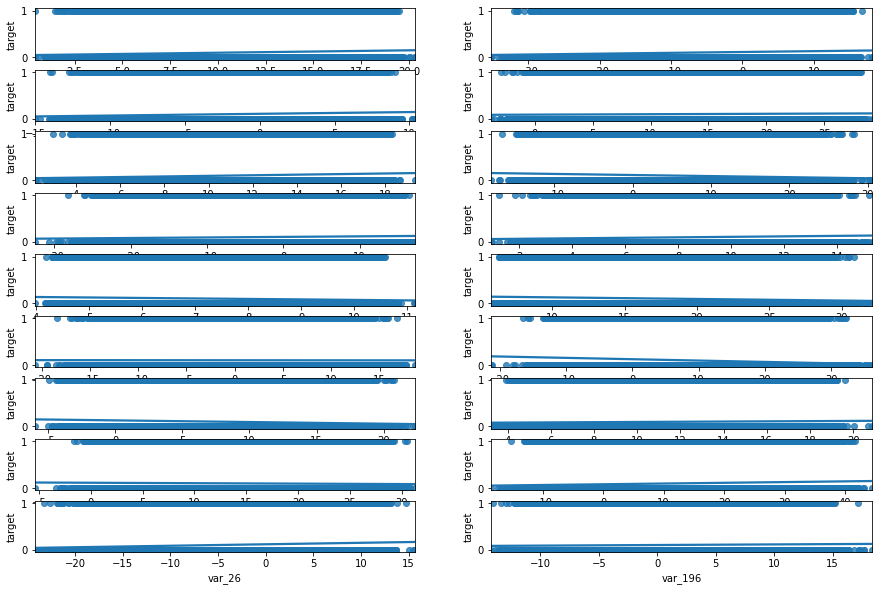

In [11]:
features = [
    'var_0', 
    'var_1',
    'var_2',
    'var_5',
    'var_9',
    'var_10',
    'var_13',
    'var_20',
    'var_26',
    'var_40',
    'var_55',
    'var_80',
    'var_106',
    'var_109',
    'var_139',
    'var_175',
    'var_184',
    'var_196'
]

fig, axes = plt.subplots(9, 2, figsize=(15, 10))
for num, feature in enumerate(features):
    sns.regplot(
        x=feature,
        y="target",
        data=df_train,
        ax=axes[num%9, num//9],
        scatter=True,
        fit_reg=True
    )

## Распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки

In [5]:
df_train_0 = df_train.loc[df_train['target'] == 0]
df_train_1 = df_train.loc[df_train['target'] == 1]

In [50]:
df_train_0.describe()

target          var_0          var_1          var_2          var_3  \
count  179902.0  179902.000000  179902.000000  179902.000000  179902.000000   
mean        0.0      10.626681      -1.695770      10.665876       6.788979   
std         0.0       3.008564       4.024813       2.612961       2.040082   
min         0.0       0.408400     -15.043400       2.117100      -0.040200   
25%         0.0       8.429500      -4.790775       8.698025       5.247625   
50%         0.0      10.478600      -1.682600      10.529000       6.817000   
75%         0.0      12.693075       1.287700      12.463900       8.317875   
max         0.0      20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       11.072412      -5.146736       5.389620      16.549306   
std         1.620103       7.827522       0.857983       3.417700   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.880600     -11.260950       4.756425      13.950125   
50%        11.104400      -4.917700       5.364400      16.460850   
75%        12.253100       0.844600       5.981300      19.108800   
max        16.671400      17.251600       8.447700      27.691800   

               var_8  ...        var_190        var_191        var_192  \
count  179902.000000  ...  179902.000000  179902.000000  179902.000000   
mean        0.262347  ...       3.149130       7.390800       1.949017   
std         3.331105  ...       4.522568       2.997847       1.476456   
min       -10.505500  ...     -14.093300      -2.691700      -3.814500   
25%        -2.342575  ...      -0.111850       5.130825       0.915300   
50%         0.371400  ...       3.117250       7.297000       1.928950   
75%         2.919300  ...       6.296375       9.461300       2.969800   
max        10.151300  ...      18.440900      16.716500       8.402400   

             var_193        var_194        var_195        var_196  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean        3.355403      18.017716      -0.155601       2.260297   
std         3.982819       3.127715       1.422275       5.441118   
min       -10.845500       8.694400      -5.261000     -14.209600   
25%         0.612400      15.656700      -1.178700      -1.987375   
50%         3.417550      17.982400      -0.184200       2.359700   
75%         6.217075      20.417500       0.813000       6.513425   
max        18.281800      27.928800       4.272900      18.321500   

             var_197        var_198        var_199  
count  179902.000000  179902.000000  179902.000000  
mean        8.919032      15.924058      -3.415273  
std         0.917467       2.978539      10.434525  
min         5.960600       6.299300     -38.852800  
25%         8.262100      13.896000     -11.312025  
50%         8.897700      15.988500      -2.914000  
75%         9.601500      18.095400       4.741400  
max        12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [6]:
df_train_1.describe()

target         var_0         var_1         var_2         var_3  \
count  20098.0  20098.000000  20098.000000  20098.000000  20098.000000   
mean       1.0     11.156418     -1.017613     11.156633      6.864113   
std        0.0      3.270293      4.220638      2.841075      2.070898   
min        1.0      0.452800    -14.037000      2.946200      0.374000   
25%        1.0      8.695875     -4.203475      8.961125      5.314300   
50%        1.0     11.001350     -0.992650     11.096700      6.900200   
75%        1.0     13.343700      2.001375     13.047025      8.384725   
max        1.0     19.458300      9.029800     18.294100     12.706900   

              var_4         var_5         var_6         var_7         var_8  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      11.131337     -4.336522      5.581966     16.514917      0.479432   
std        1.649266      8.140281      0.922442      3.421365      3.340028   
min        5.876200    -28.246100      2.496000      7.302400     -9.839100   
25%        9.911250    -10.615800      4.882250     13.880125     -2.107425   
50%       11.156300     -4.101950      5.601800     16.412700      0.579600   
75%       12.328450      1.619950      6.218550     19.044250      3.127825   
max       15.692500     16.423600      8.285200     27.039800      9.033000   

       ...       var_190       var_191       var_192       var_193  \
count  ...  20098.000000  20098.000000  20098.000000  20098.000000   
mean   ...      3.998064      7.864560      1.738266      3.120260   
std    ...      4.814830      3.210779      1.482537      4.067550   
min    ...    -11.906900     -2.343000     -3.317700    -11.783400   
25%    ...      0.466025      5.418550      0.669775      0.343000   
50%    ...      4.017500      7.846550      1.667500      3.176700   
75%    ...      7.407925     10.018400      2.749050      6.063825   
max    ...     16.746100     16.520500      7.647600     17.150400   

            var_194       var_195       var_196       var_197       var_198  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      17.779568     -0.021130      2.688583      8.810815     15.393283   
std        3.193153      1.485975      5.556892      0.952554      3.248123   
min       10.120700     -5.018500    -14.020400      6.119000      6.558700   
25%       15.420025     -1.103950     -1.572225      8.155250     13.232500   
50%       17.730500     -0.057350      2.831050      8.795400     15.427950   
75%       20.201800      0.986450      6.956250      9.517000     17.776425   
max       27.295300      4.088100     17.161400     11.706900     25.857100   

            var_199  
count  20098.000000  
mean      -2.532243  
std       10.435910  
min      -38.852800  
25%      -10.285050  
50%       -1.971850  
75%        5.701475  
max       24.564600  

[8 rows x 201 columns]

## Распределение коэффициентов корреляции между признаками

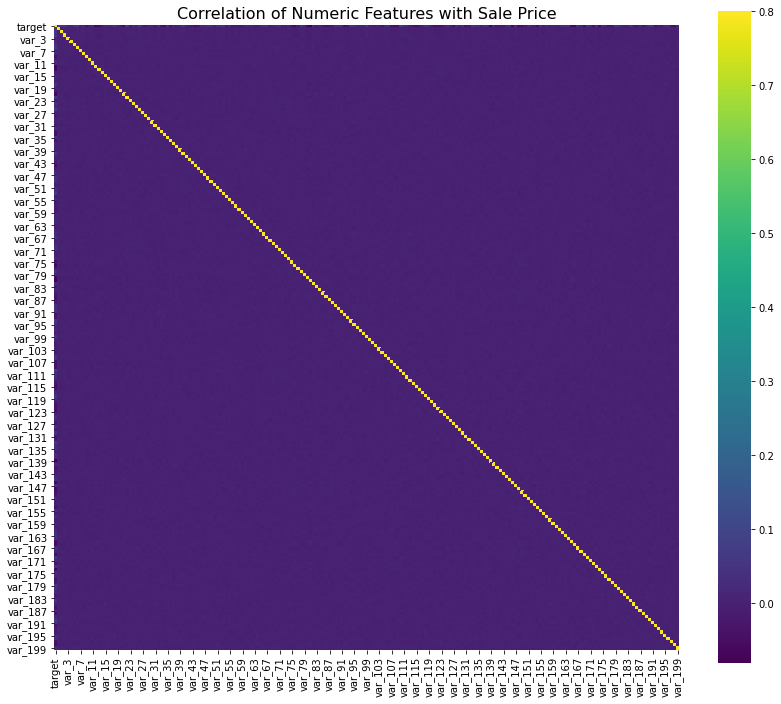

In [13]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)

fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

Анализ коэффициентов корреляции показал, что зависимостей между признаками нет.

## 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной

In [46]:
correlation['target'].abs().sort_values().head(10)

var_185    0.000053
var_27     0.000582
var_30     0.000638
var_17     0.000864
var_38     0.000970
var_41     0.001298
var_126    0.001393
var_103    0.001395
var_10     0.002213
var_100    0.002215
Name: target, dtype: float64

## Анализ идентичности распределения признаков на обучающей и тестовой выборках

In [29]:
def show_plot(val, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(50, 50))

    for num, feature in enumerate(val):
        try:
            train_data, test_data = df_train[feature].copy(), df_test[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="blue", label="train")
            sns.kdeplot(test_data, ax=axes[num//cols, num%cols], color="green", label="test")
        except RuntimeError:
            pass
        except KeyError:
            train_data = df_train[feature].copy()
            sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="blue", label="train")
        axes[num//cols, num%cols].set_title(feature, fontsize=17)

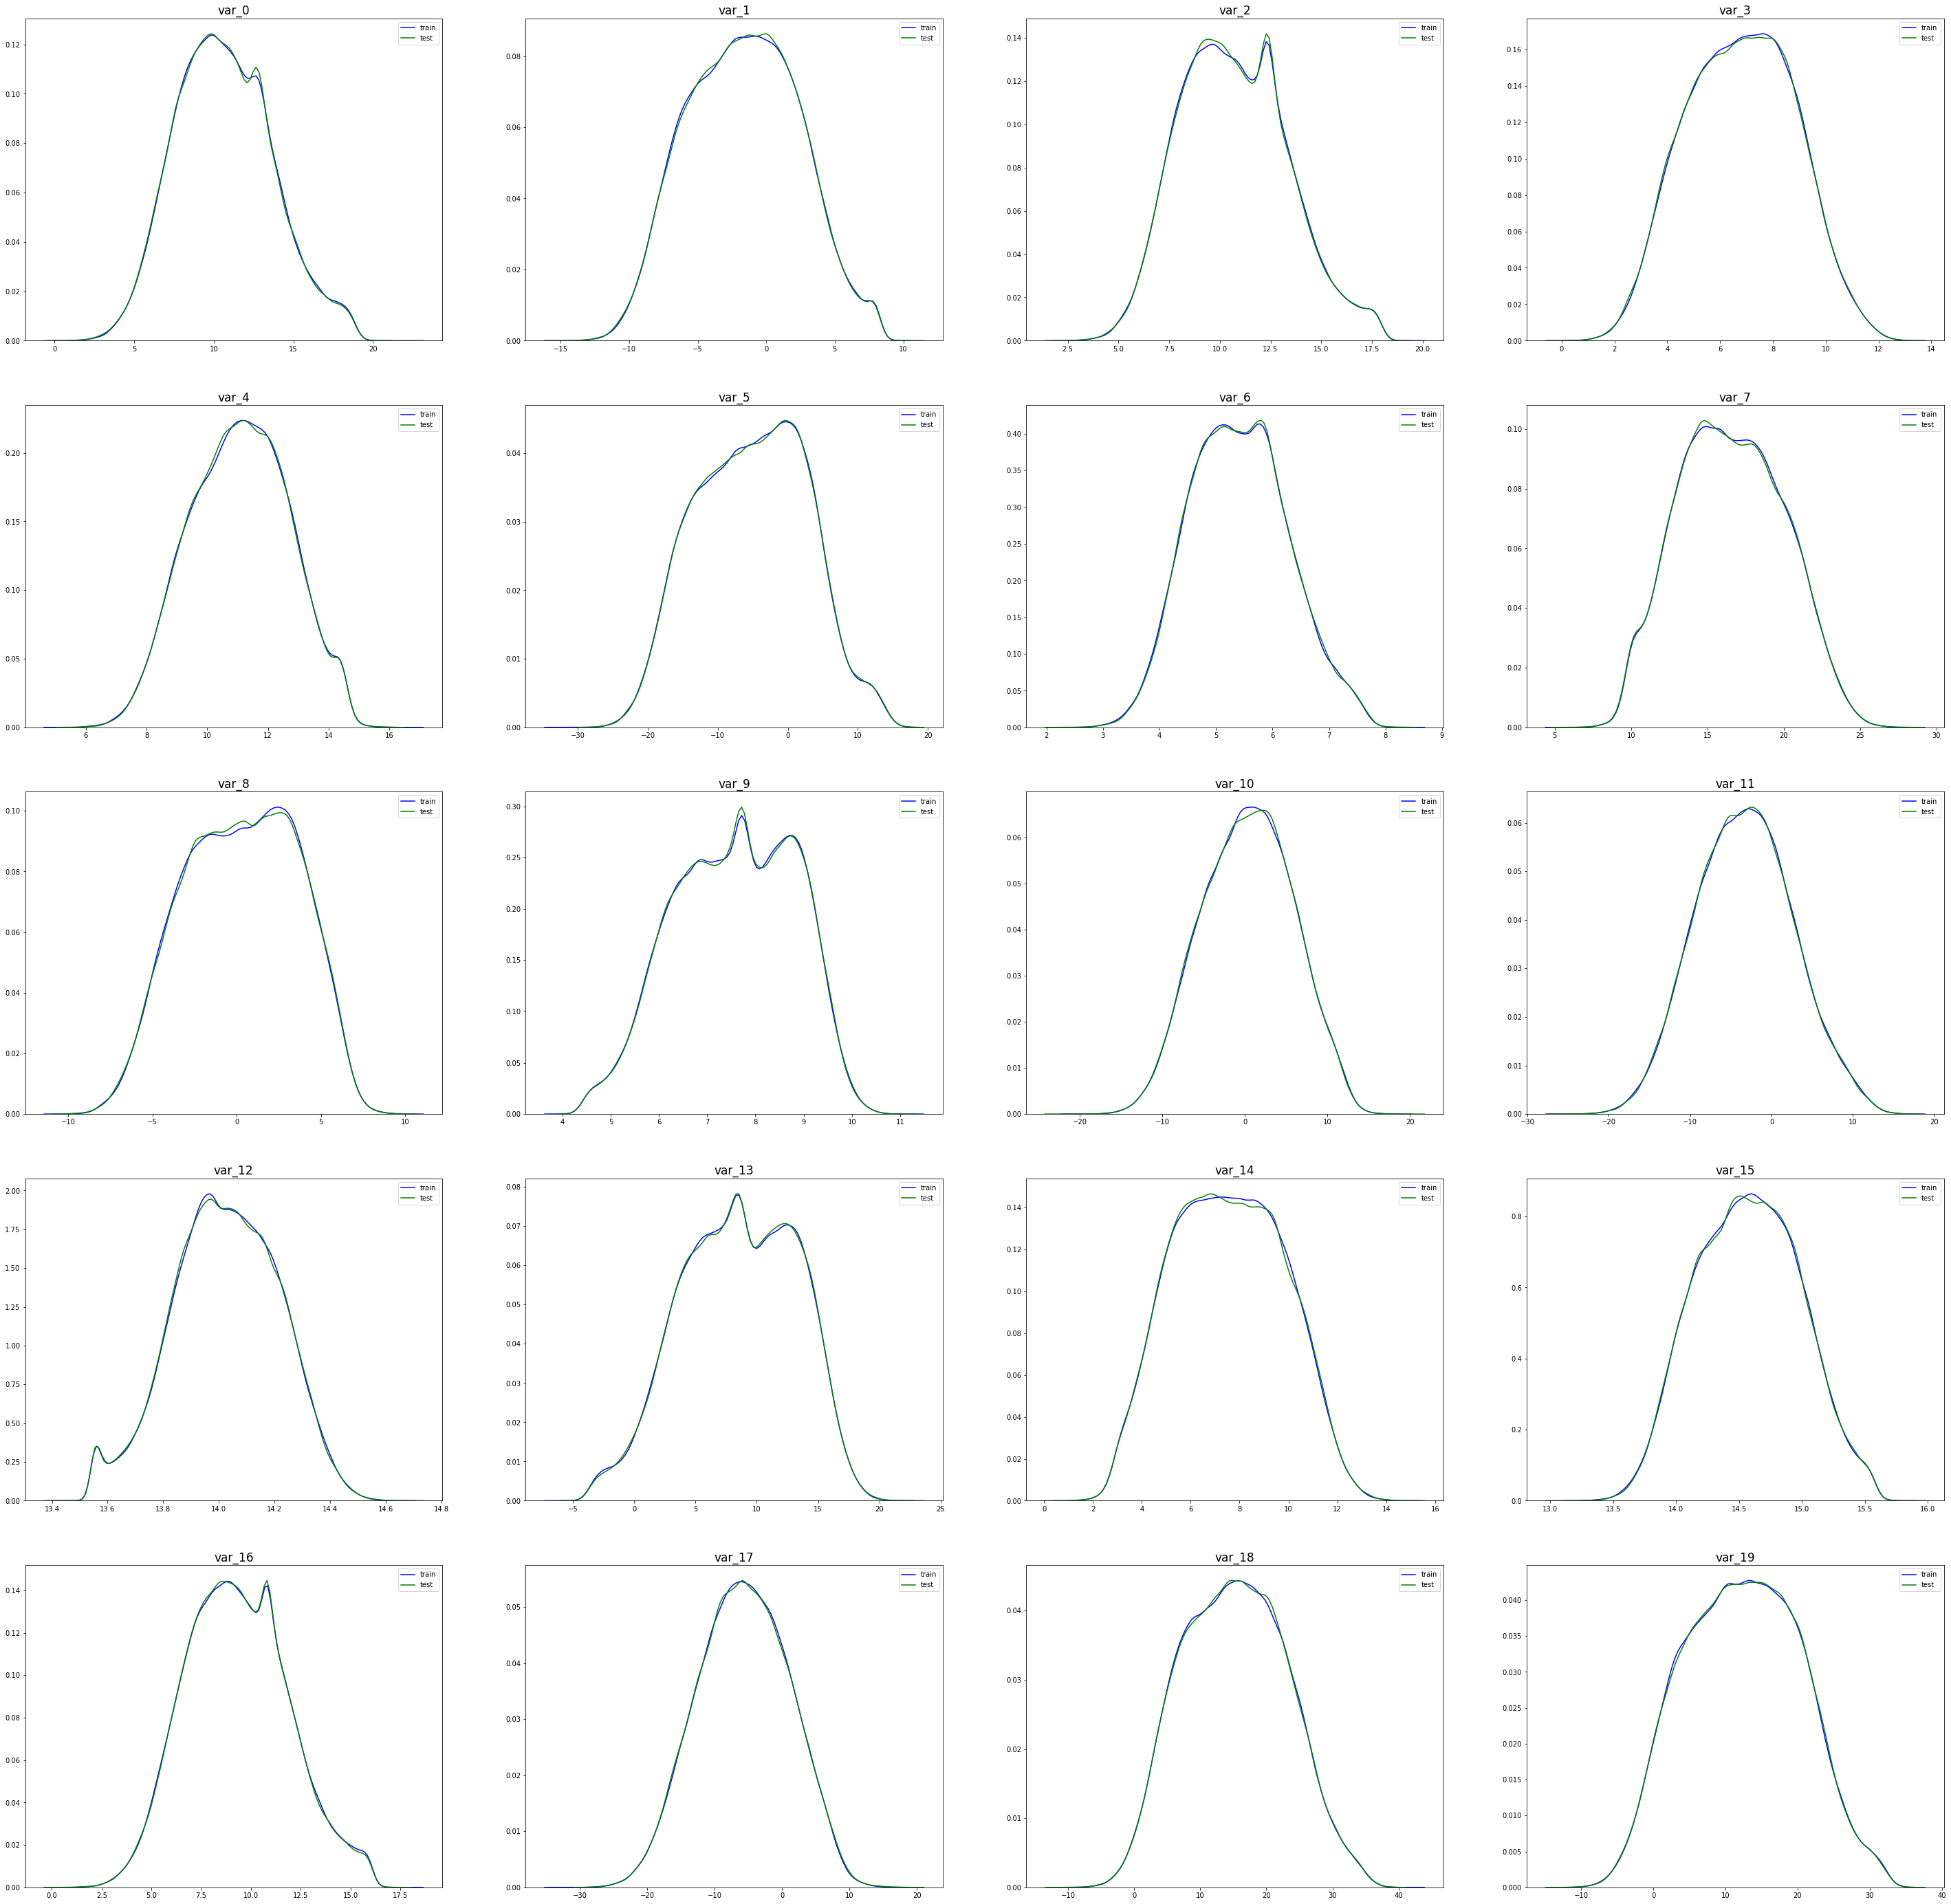

In [30]:
show_plot(continuous_feature[:20], 5, 4)

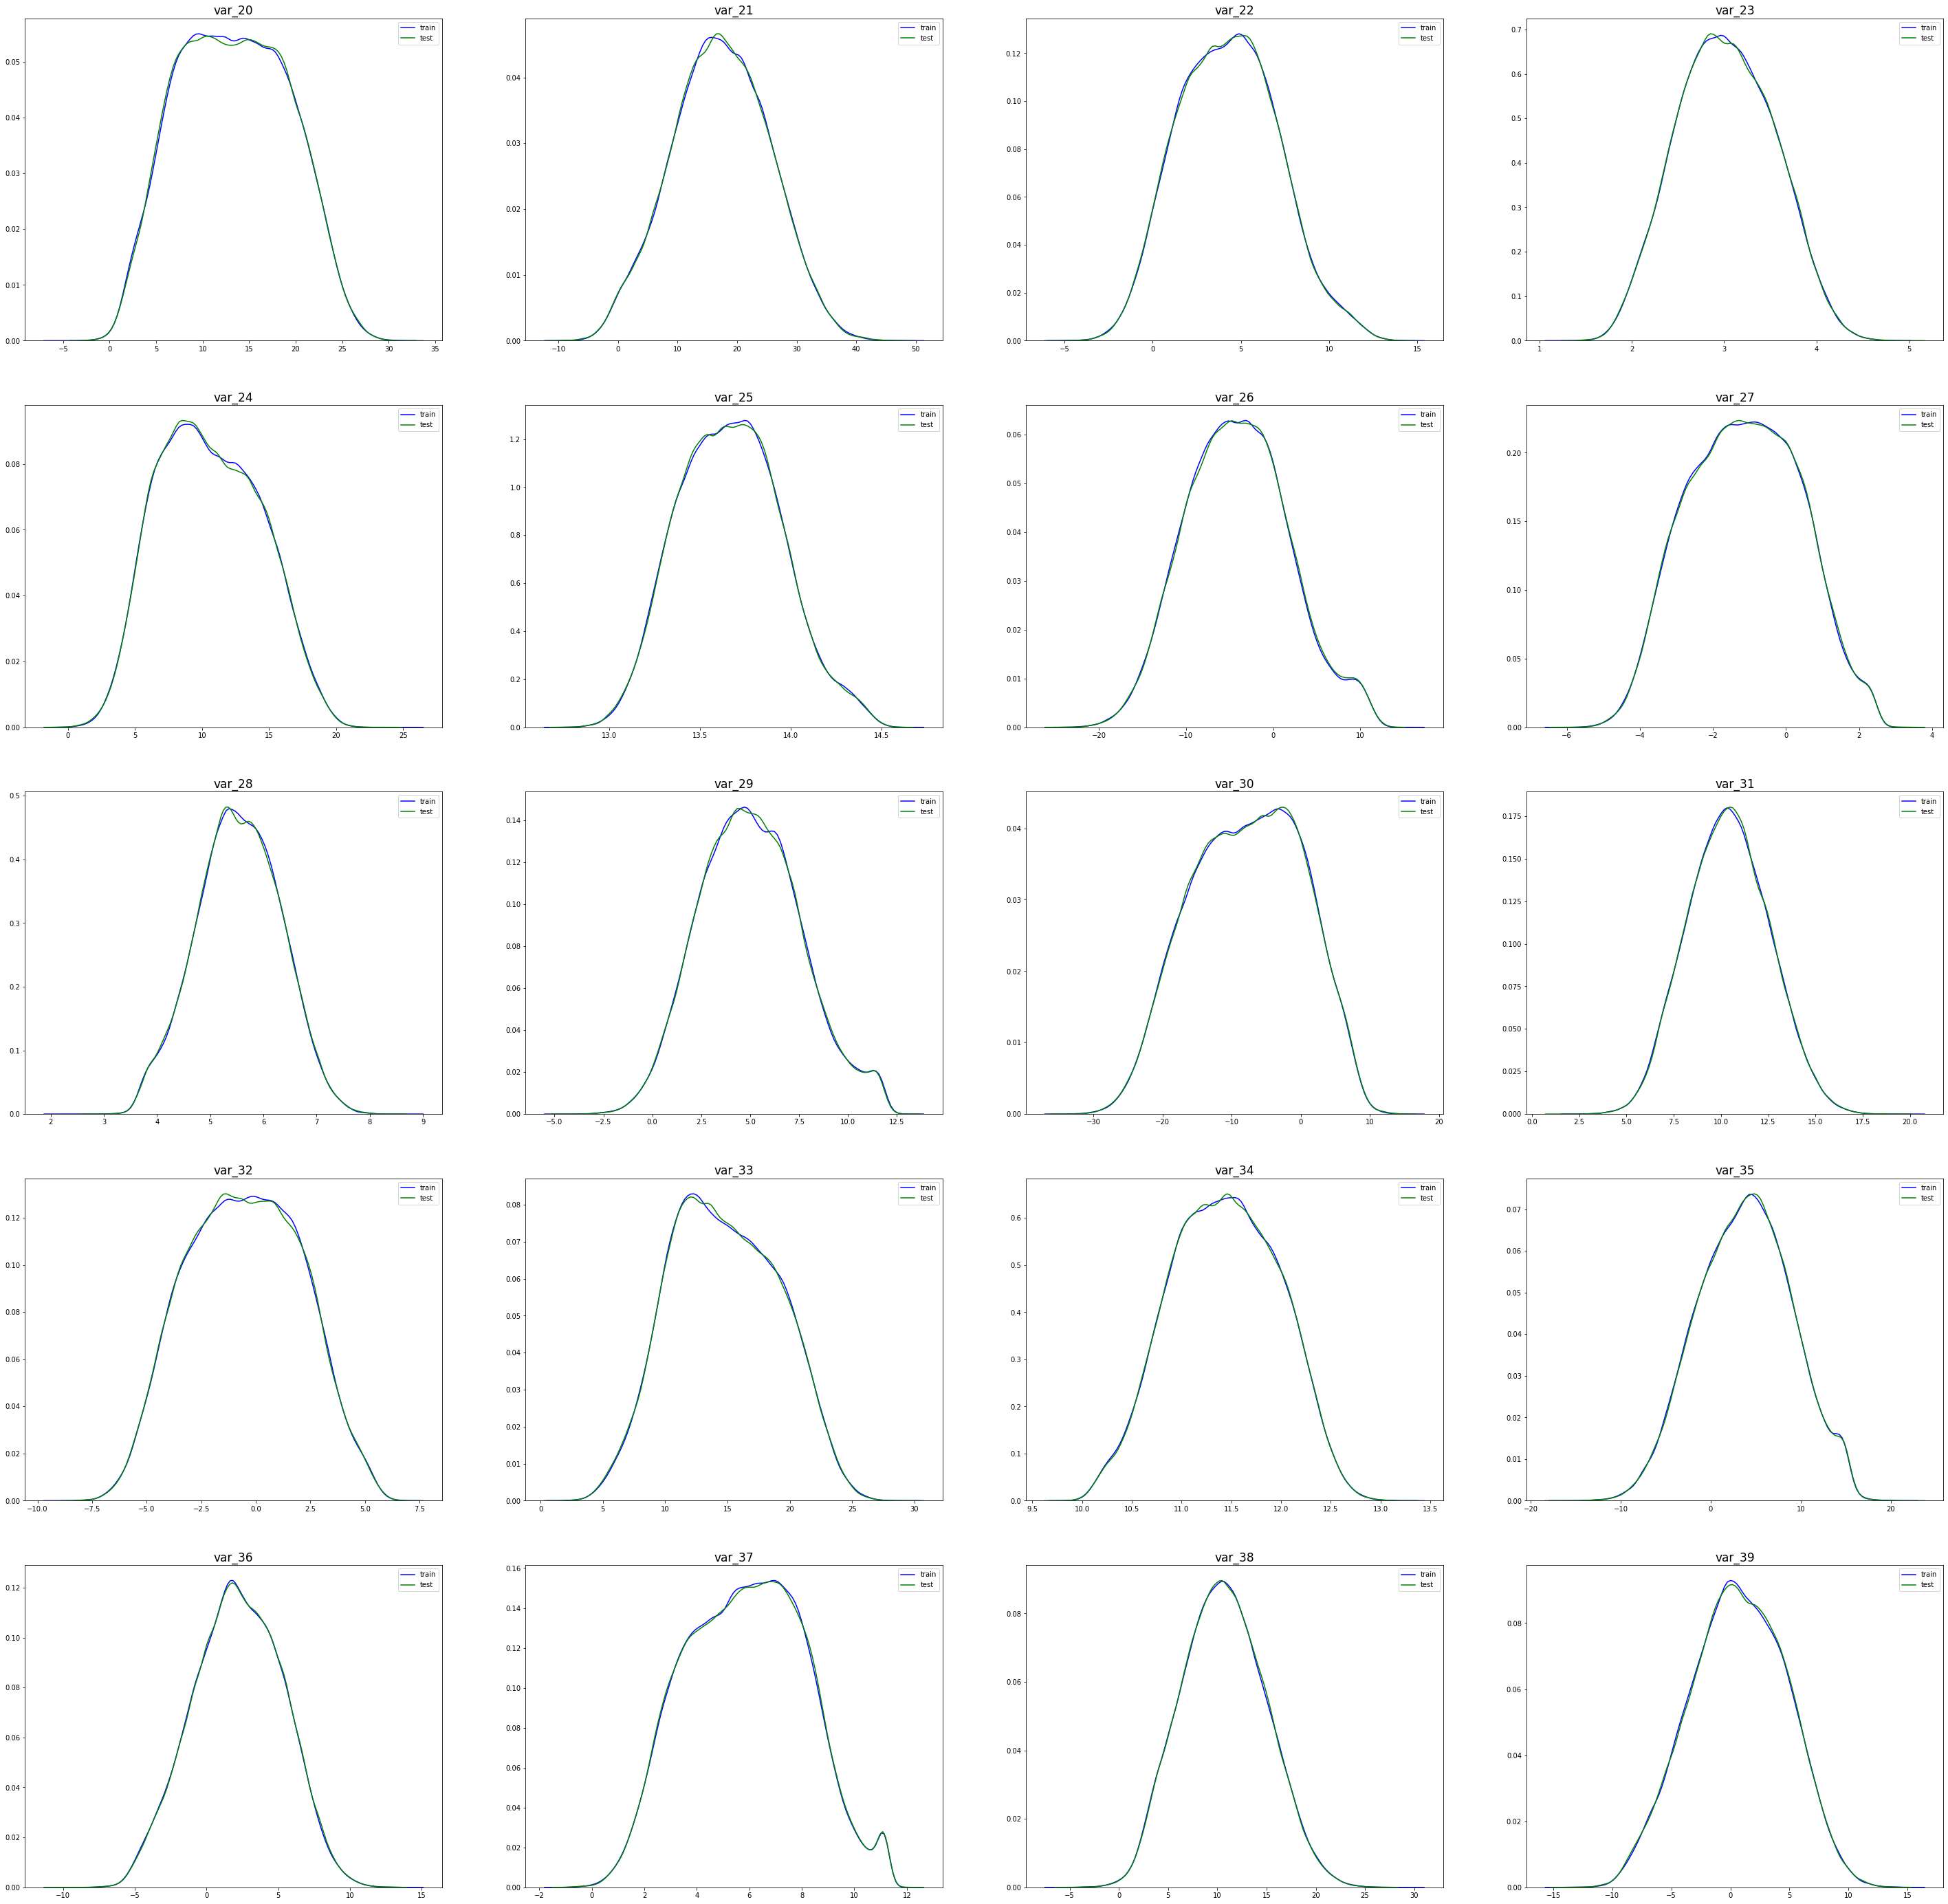

In [33]:
show_plot(continuous_feature[20:40], 5, 4)

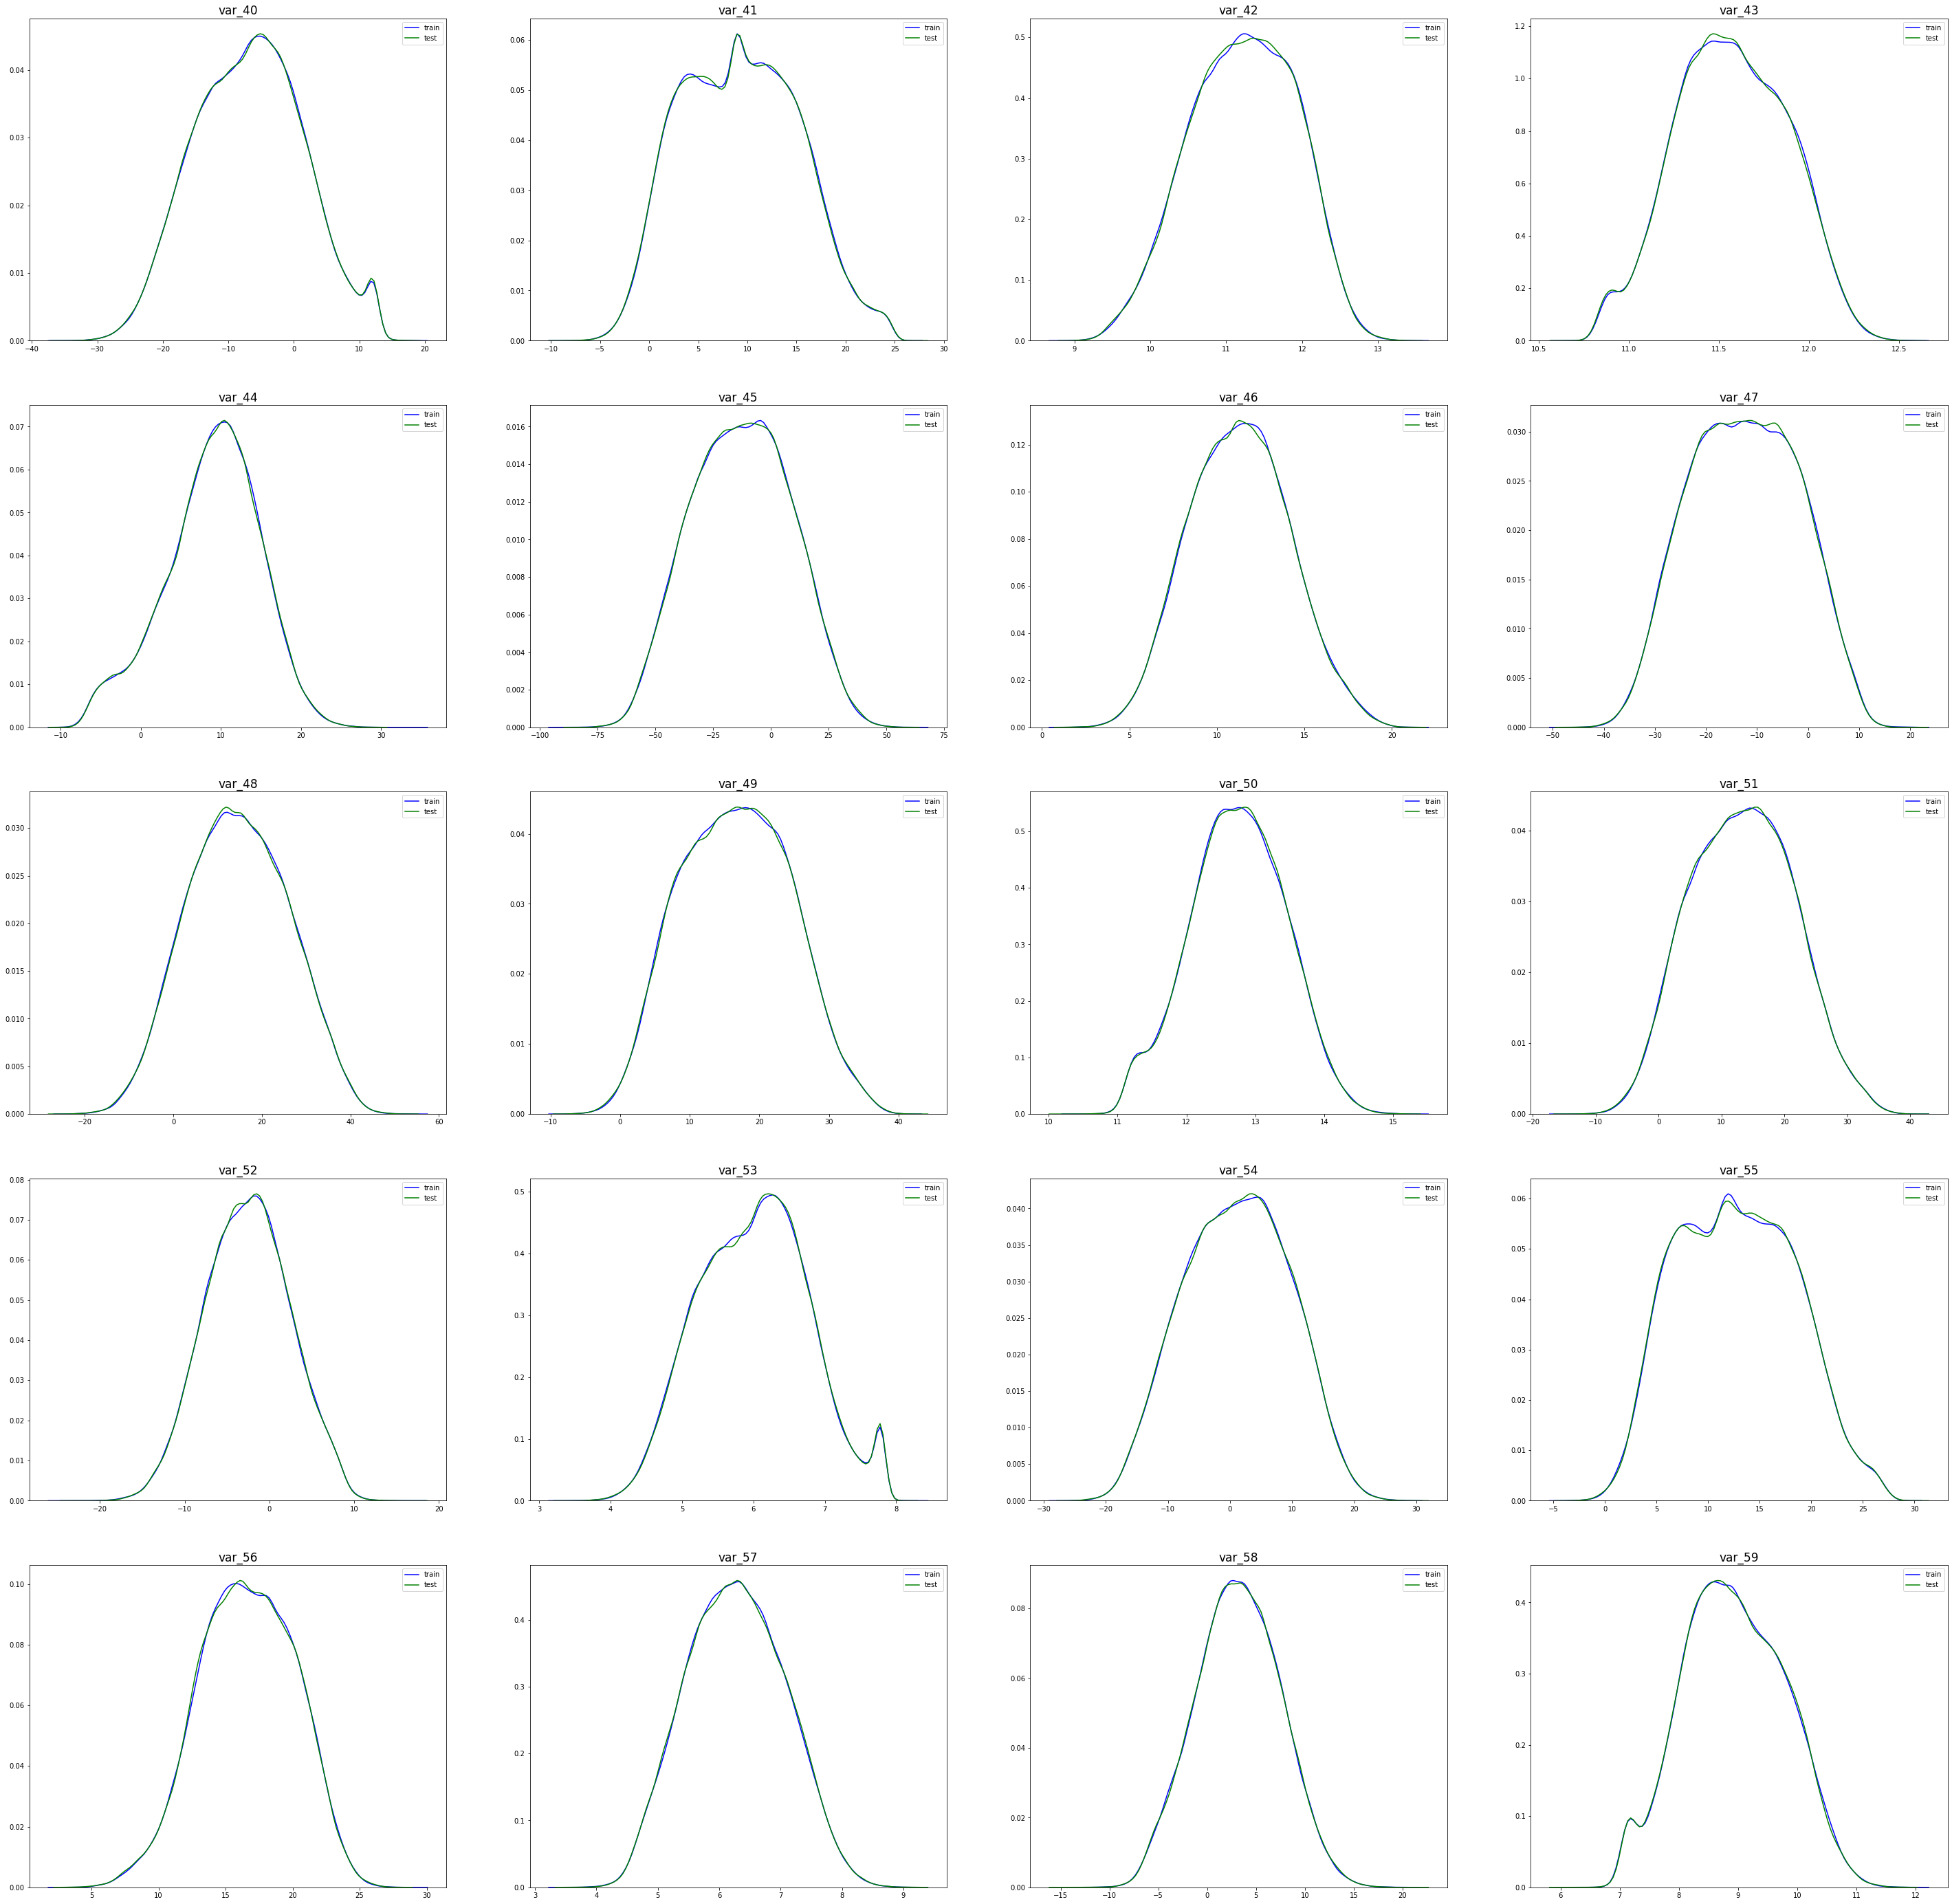

In [34]:
show_plot(continuous_feature[40:60], 5, 4)

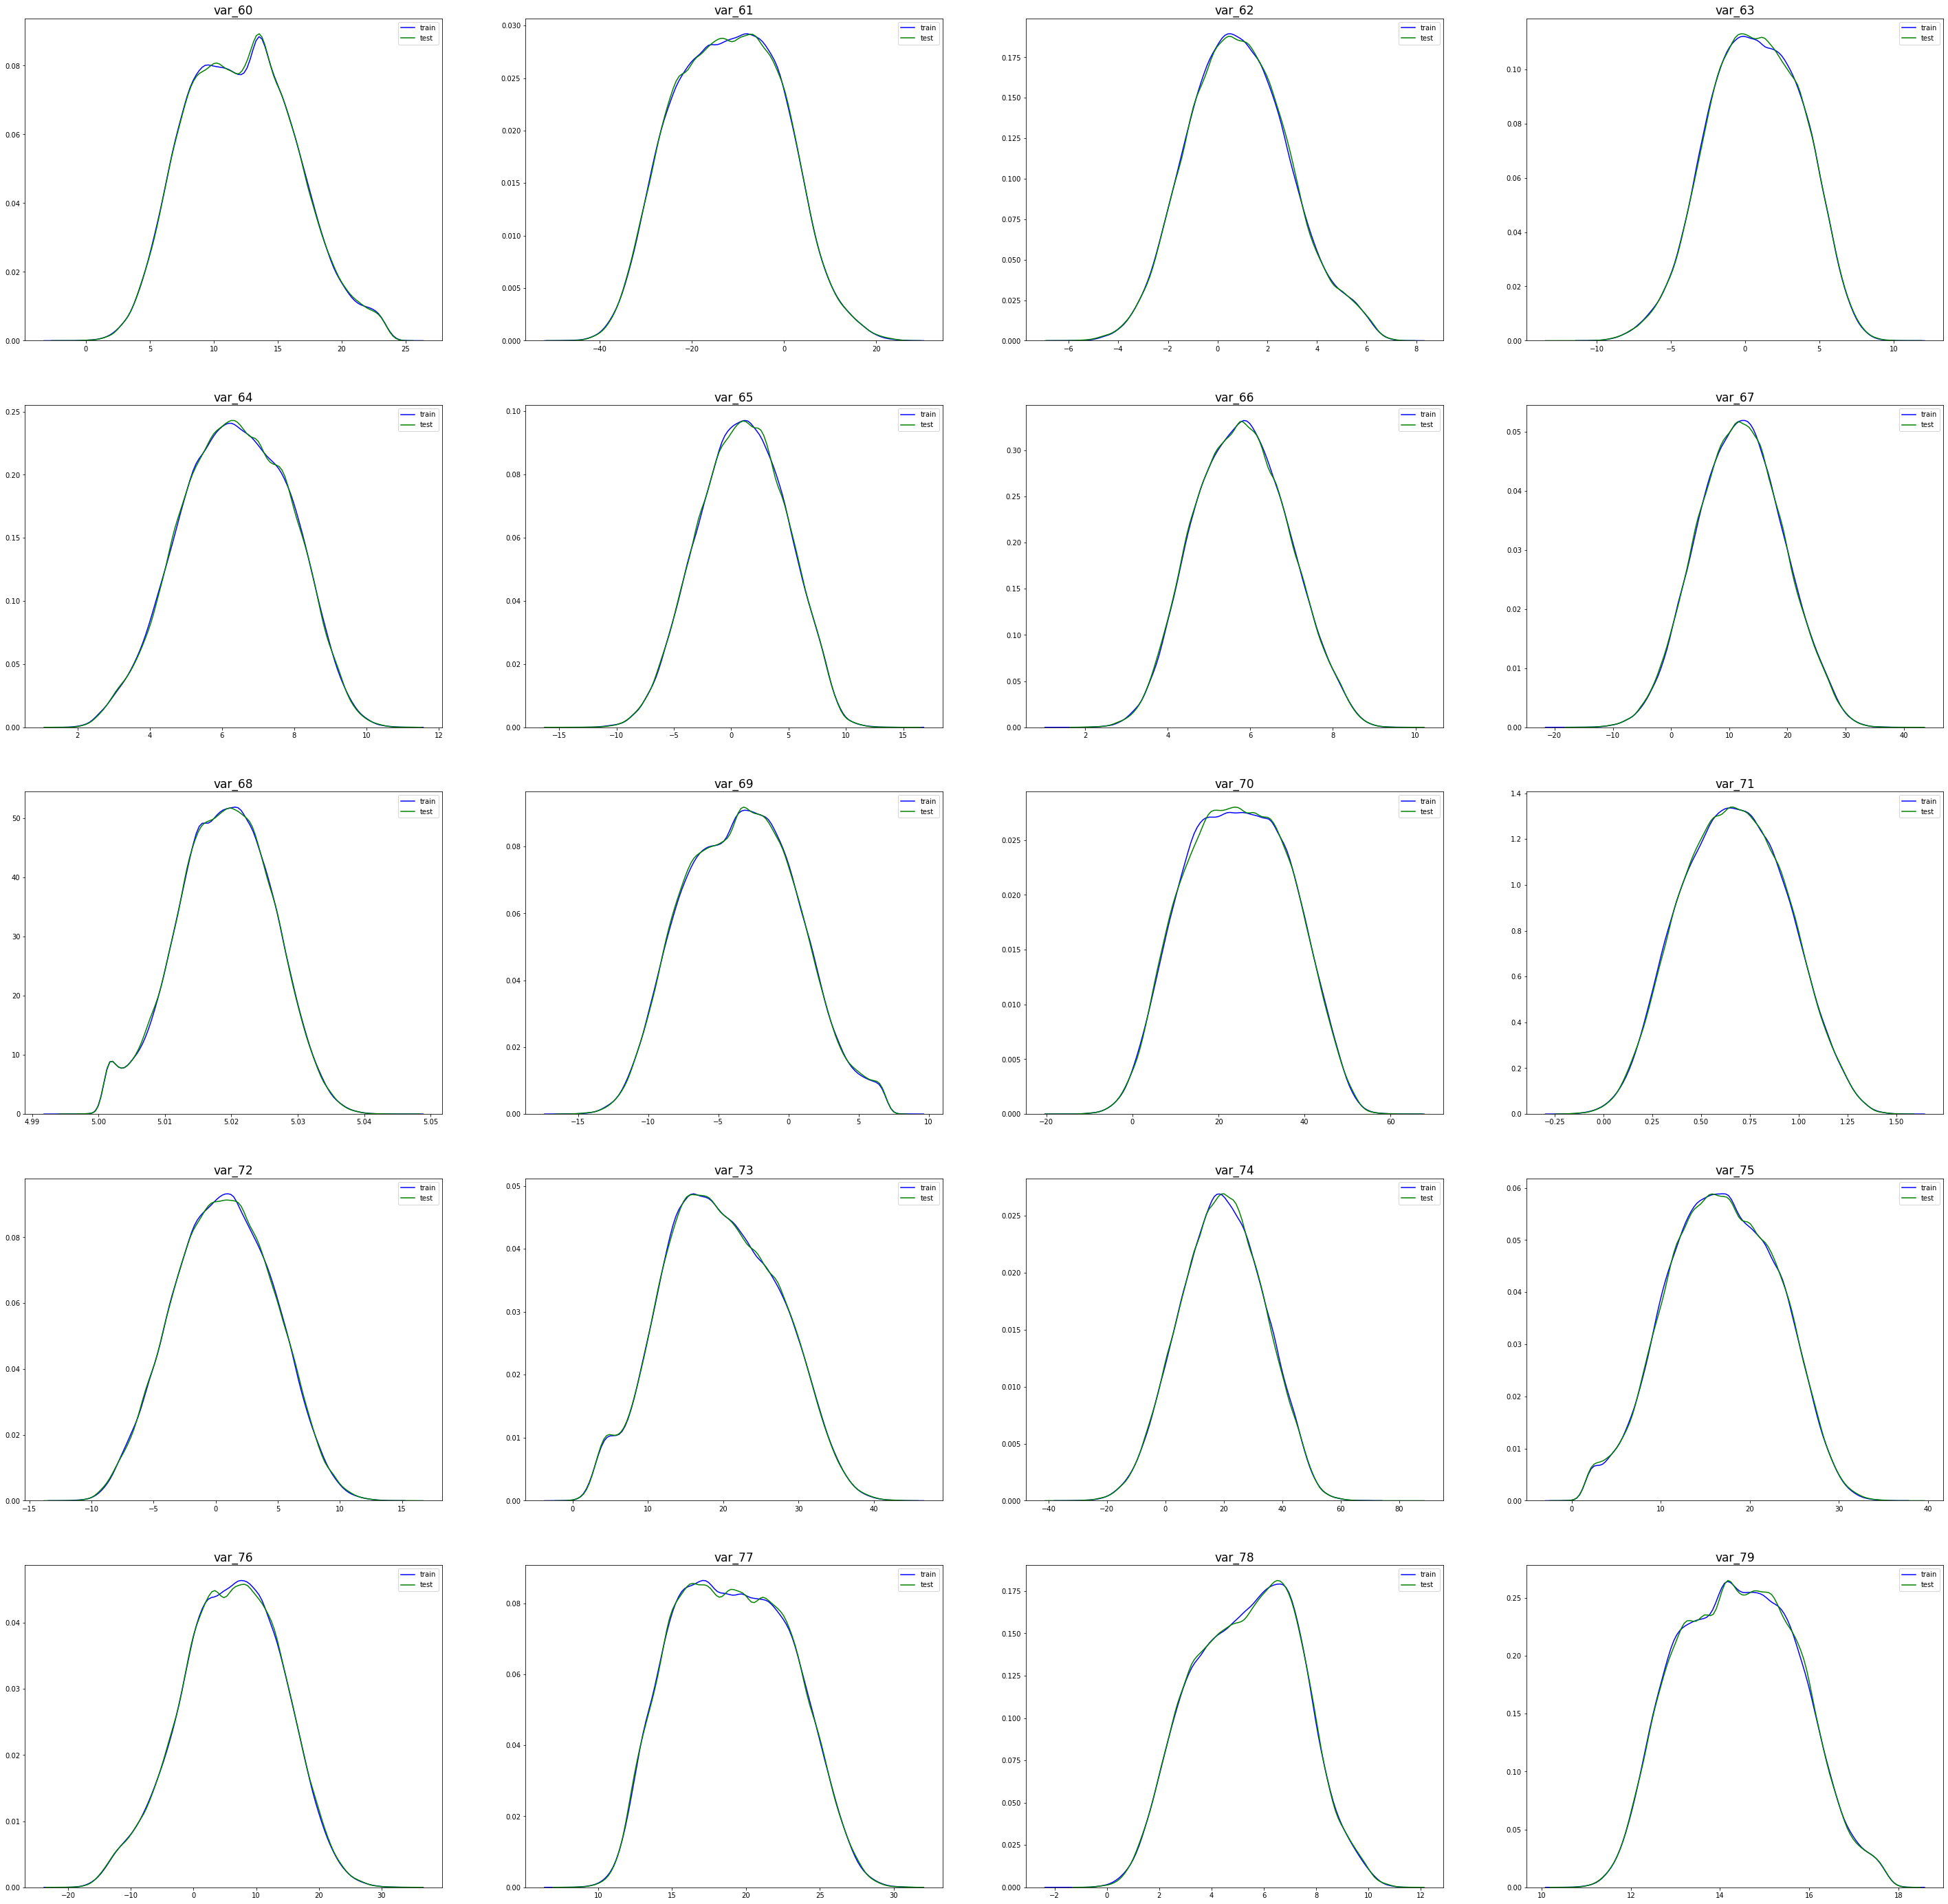

In [35]:
show_plot(continuous_feature[60:80], 5, 4)

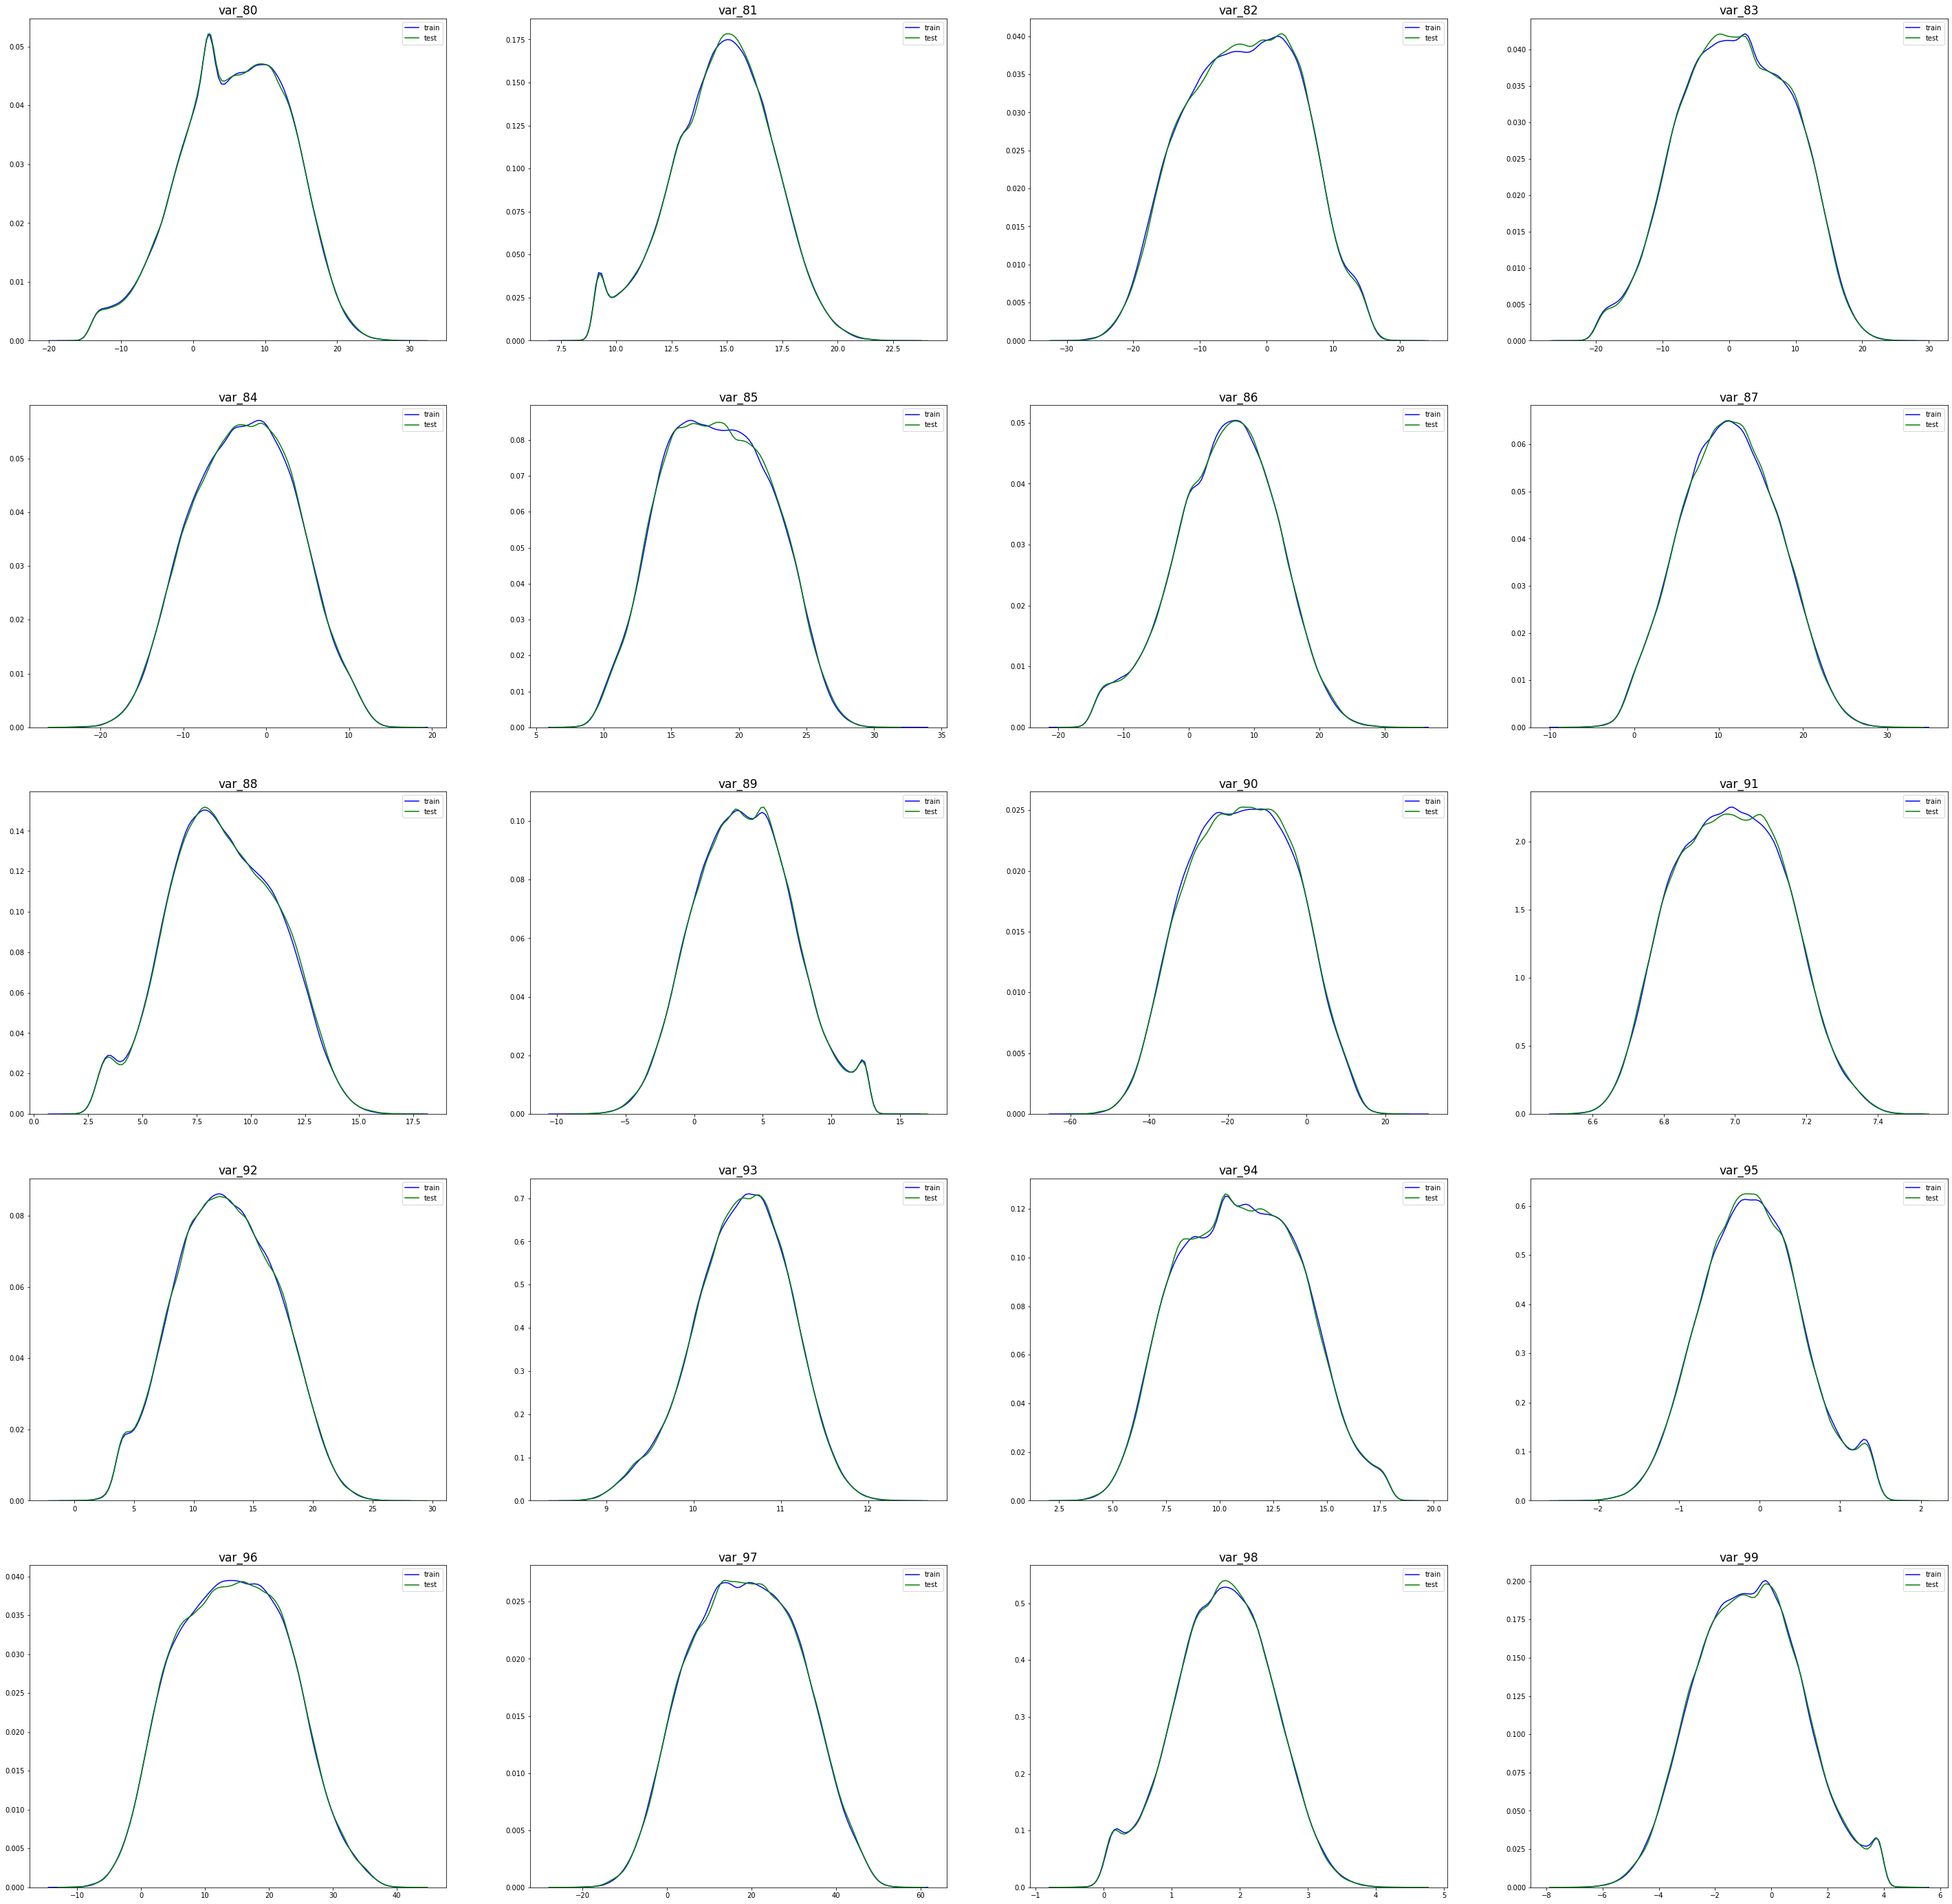

In [36]:
show_plot(continuous_feature[80:100], 5, 4)

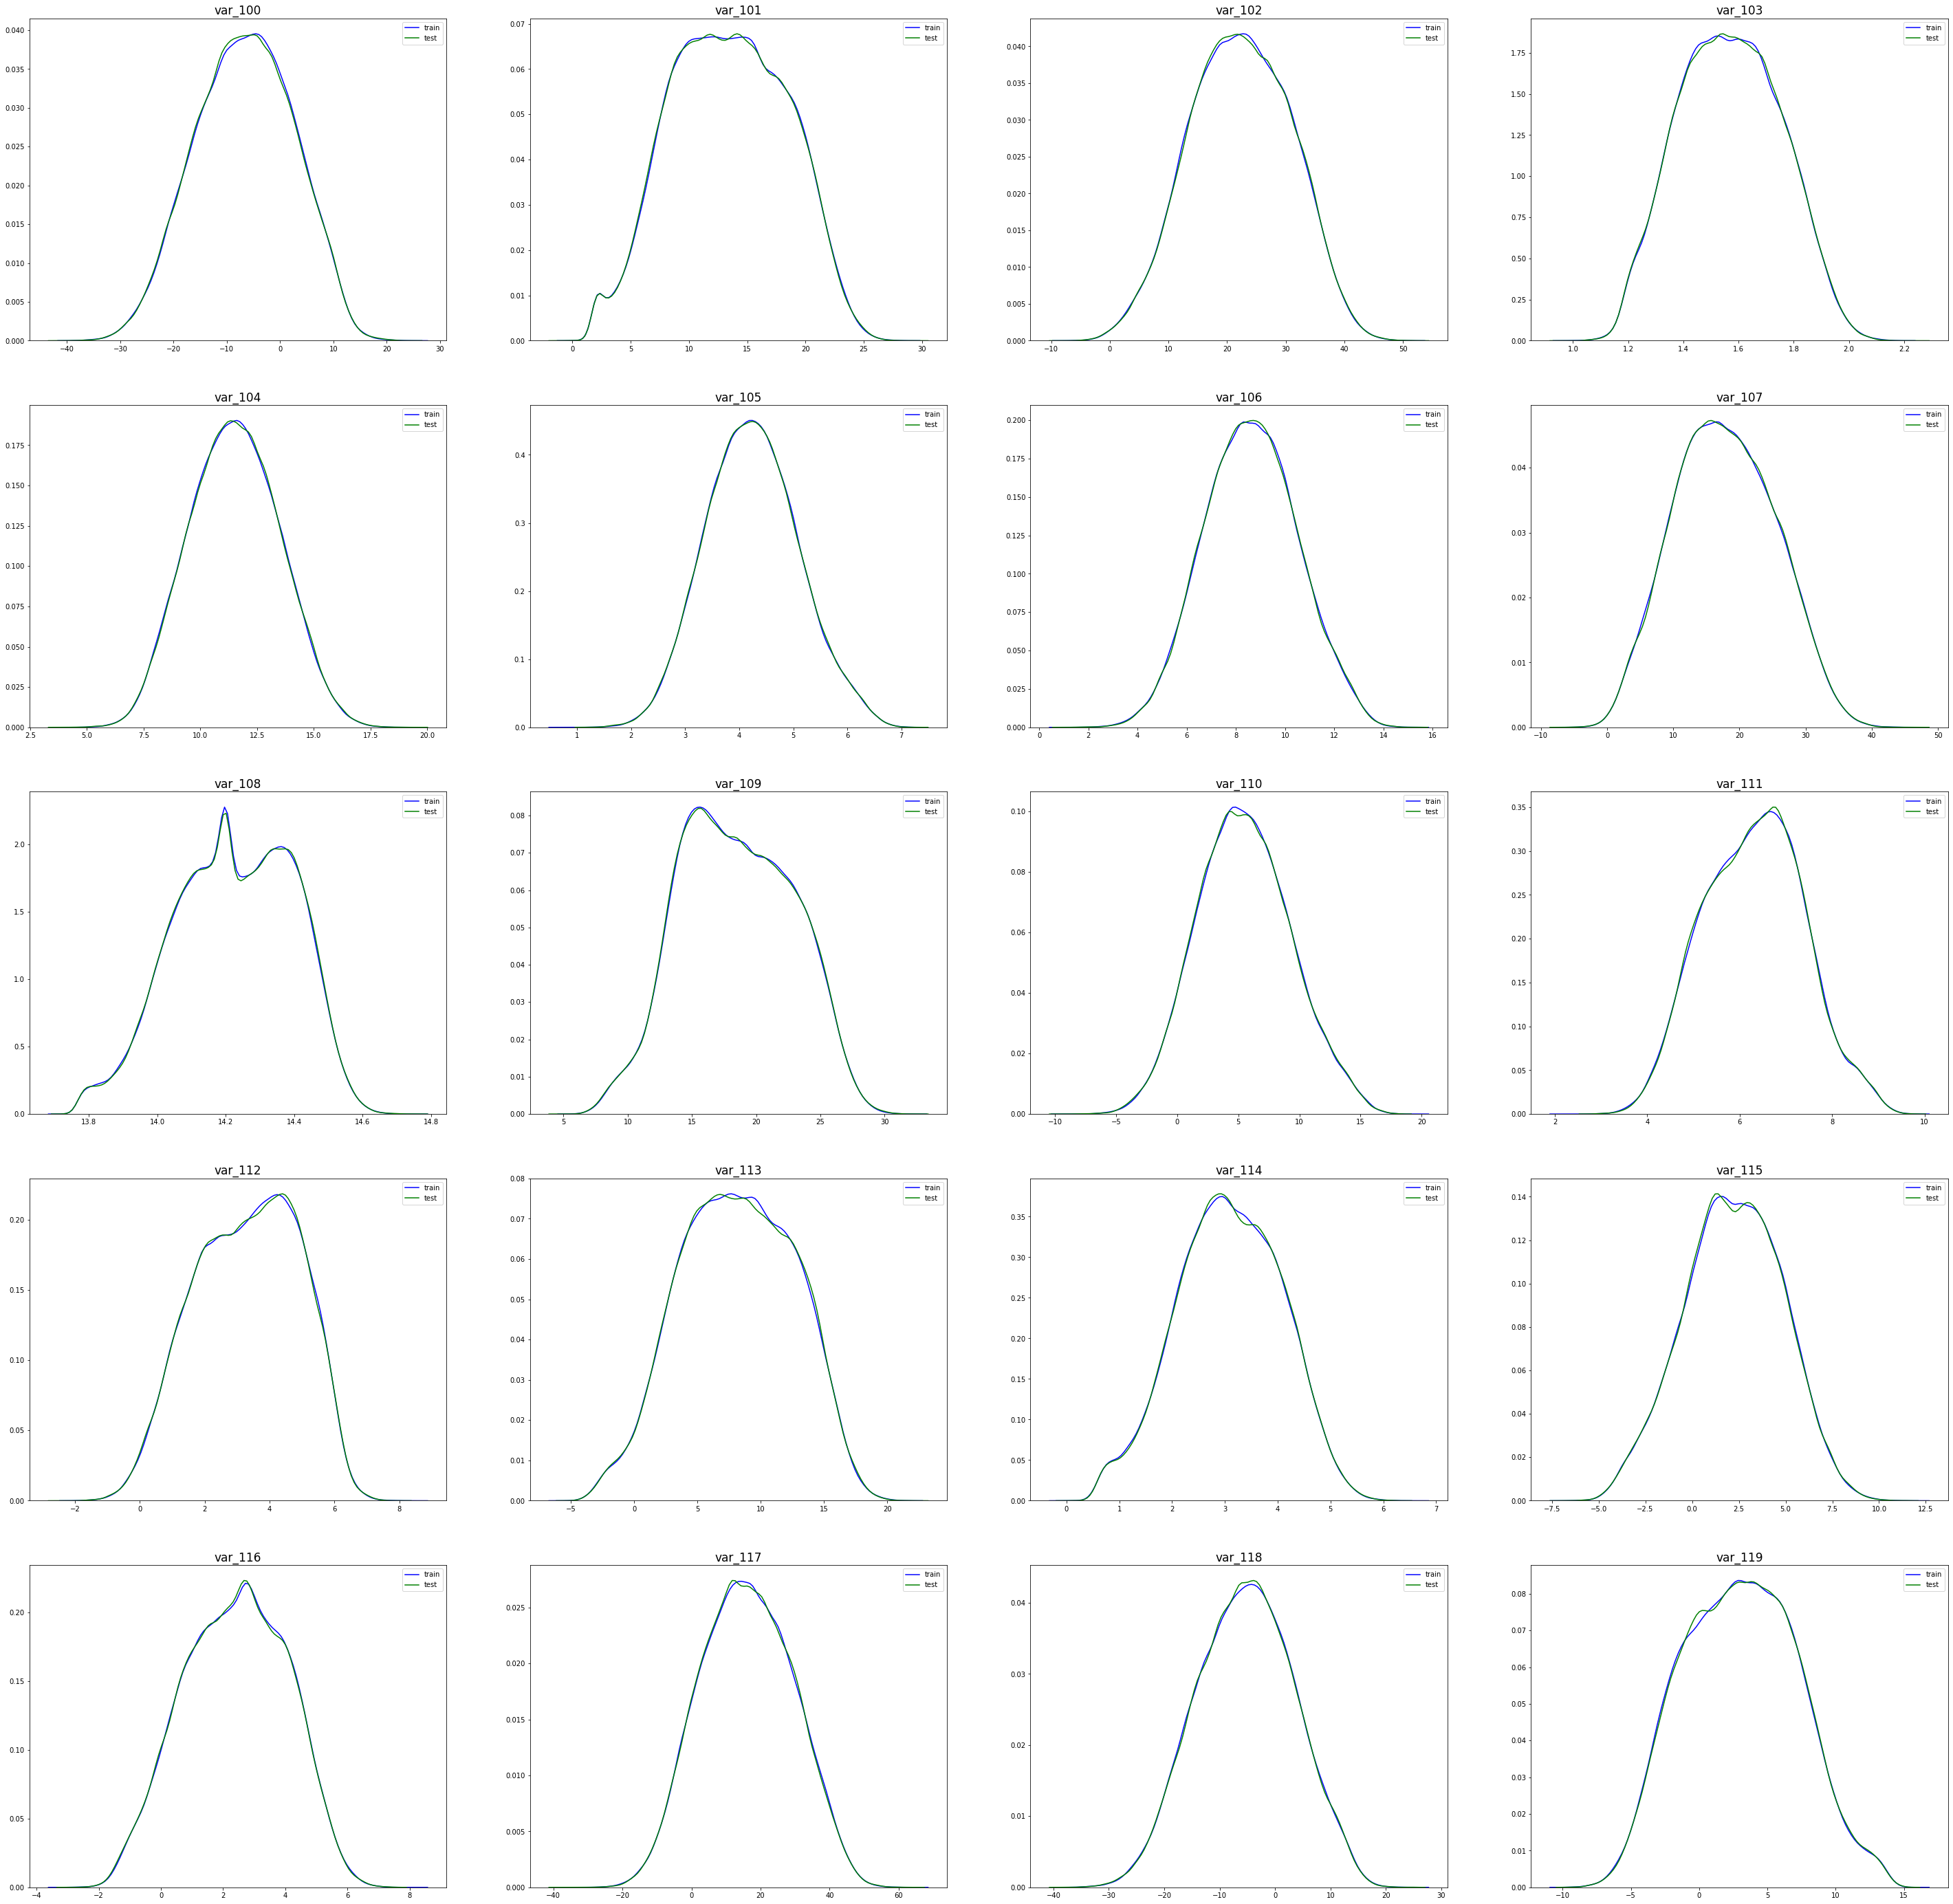

In [37]:
show_plot(continuous_feature[100:120], 5, 4)

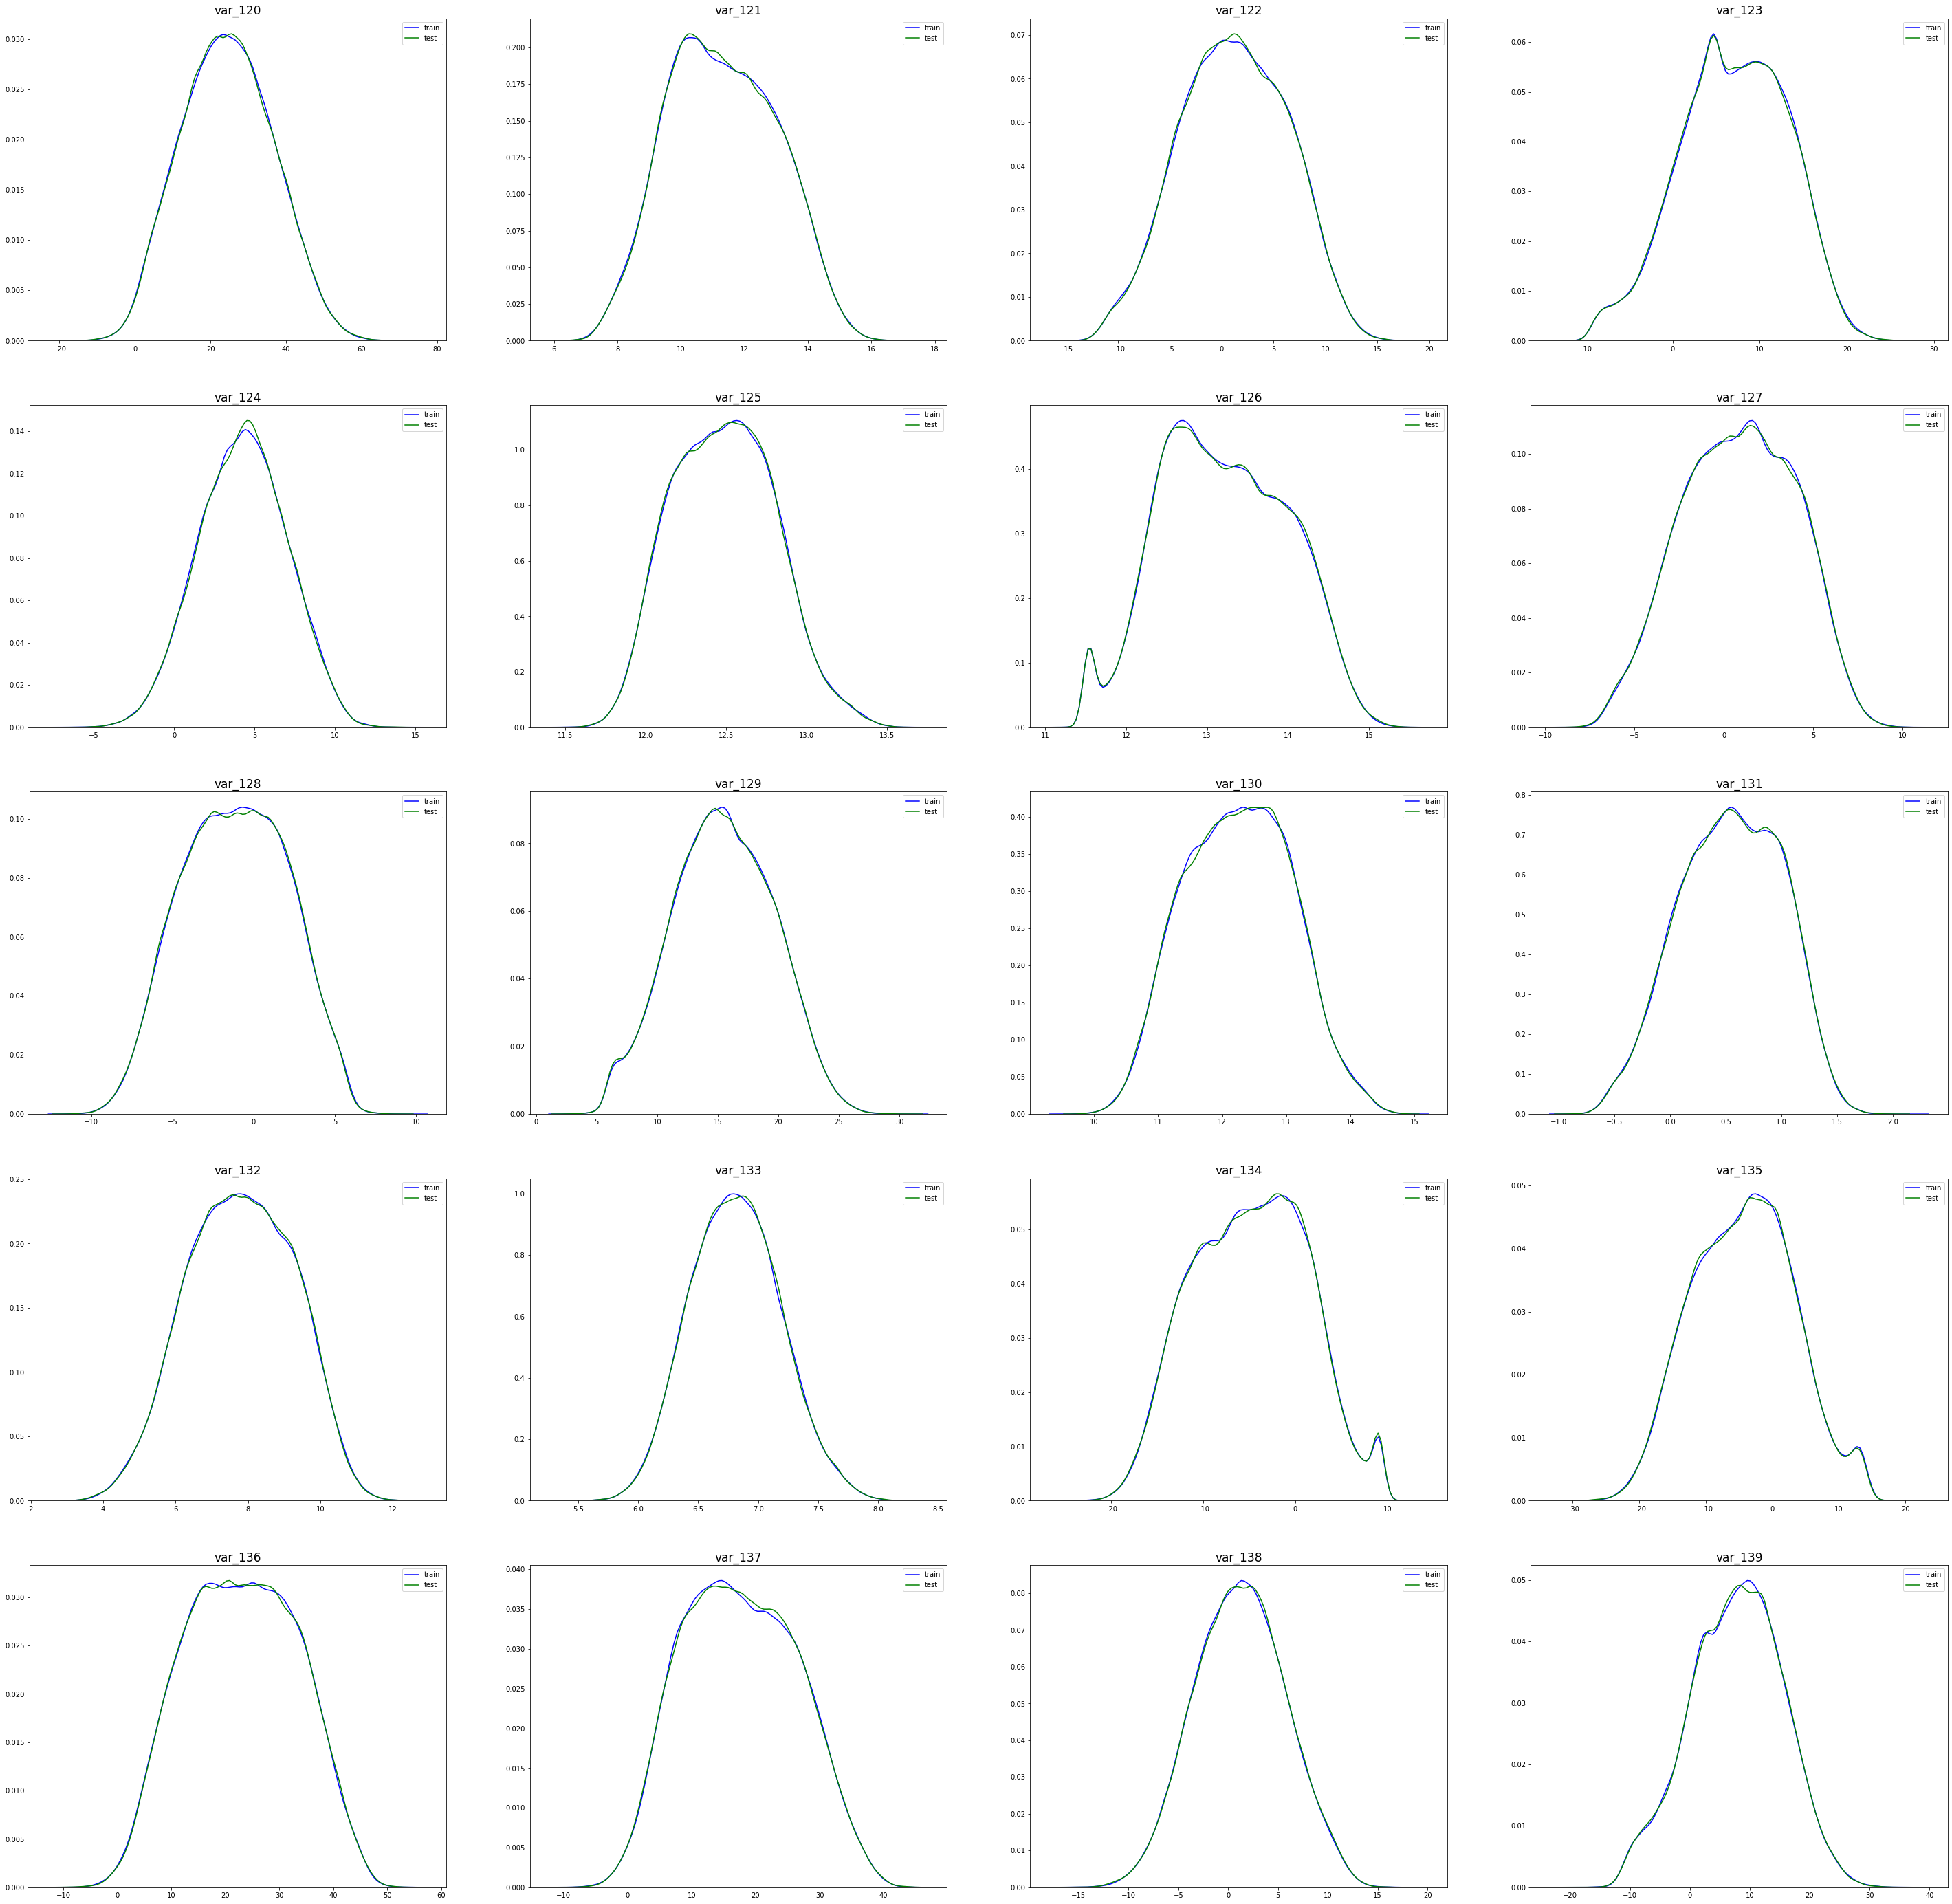

In [38]:
show_plot(continuous_feature[120:140], 5, 4)

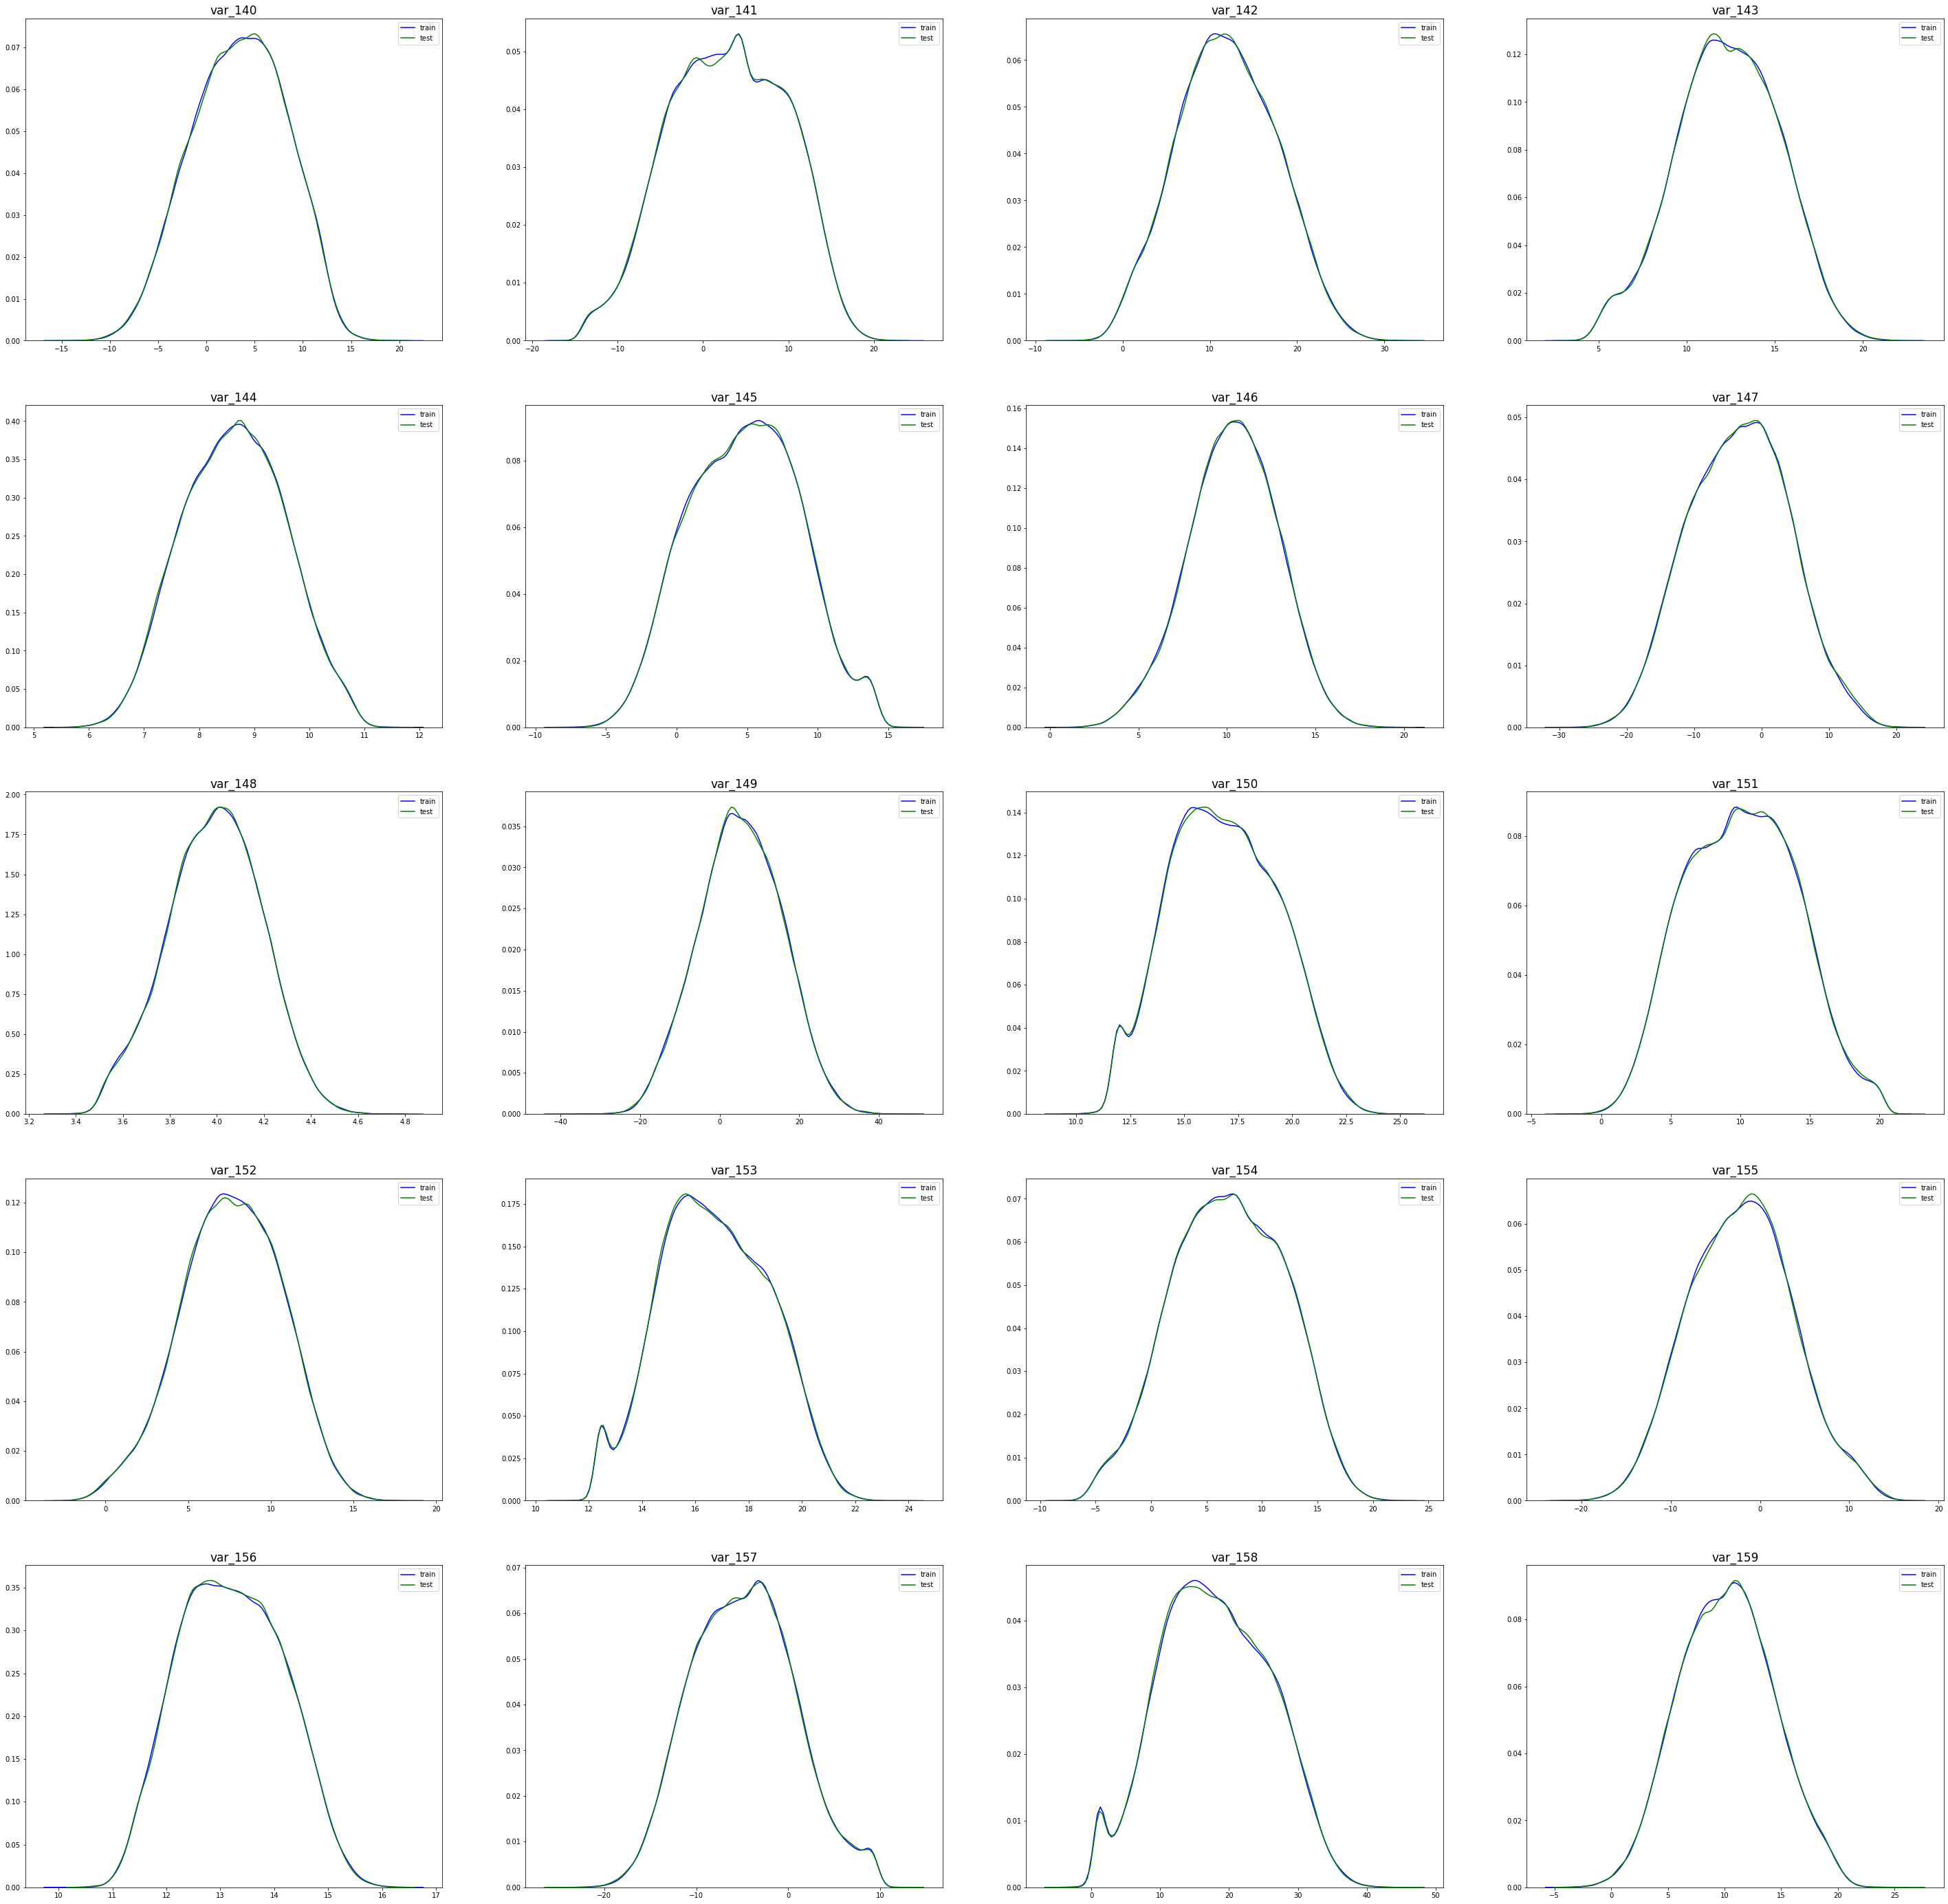

In [39]:
show_plot(continuous_feature[140:160], 5, 4)

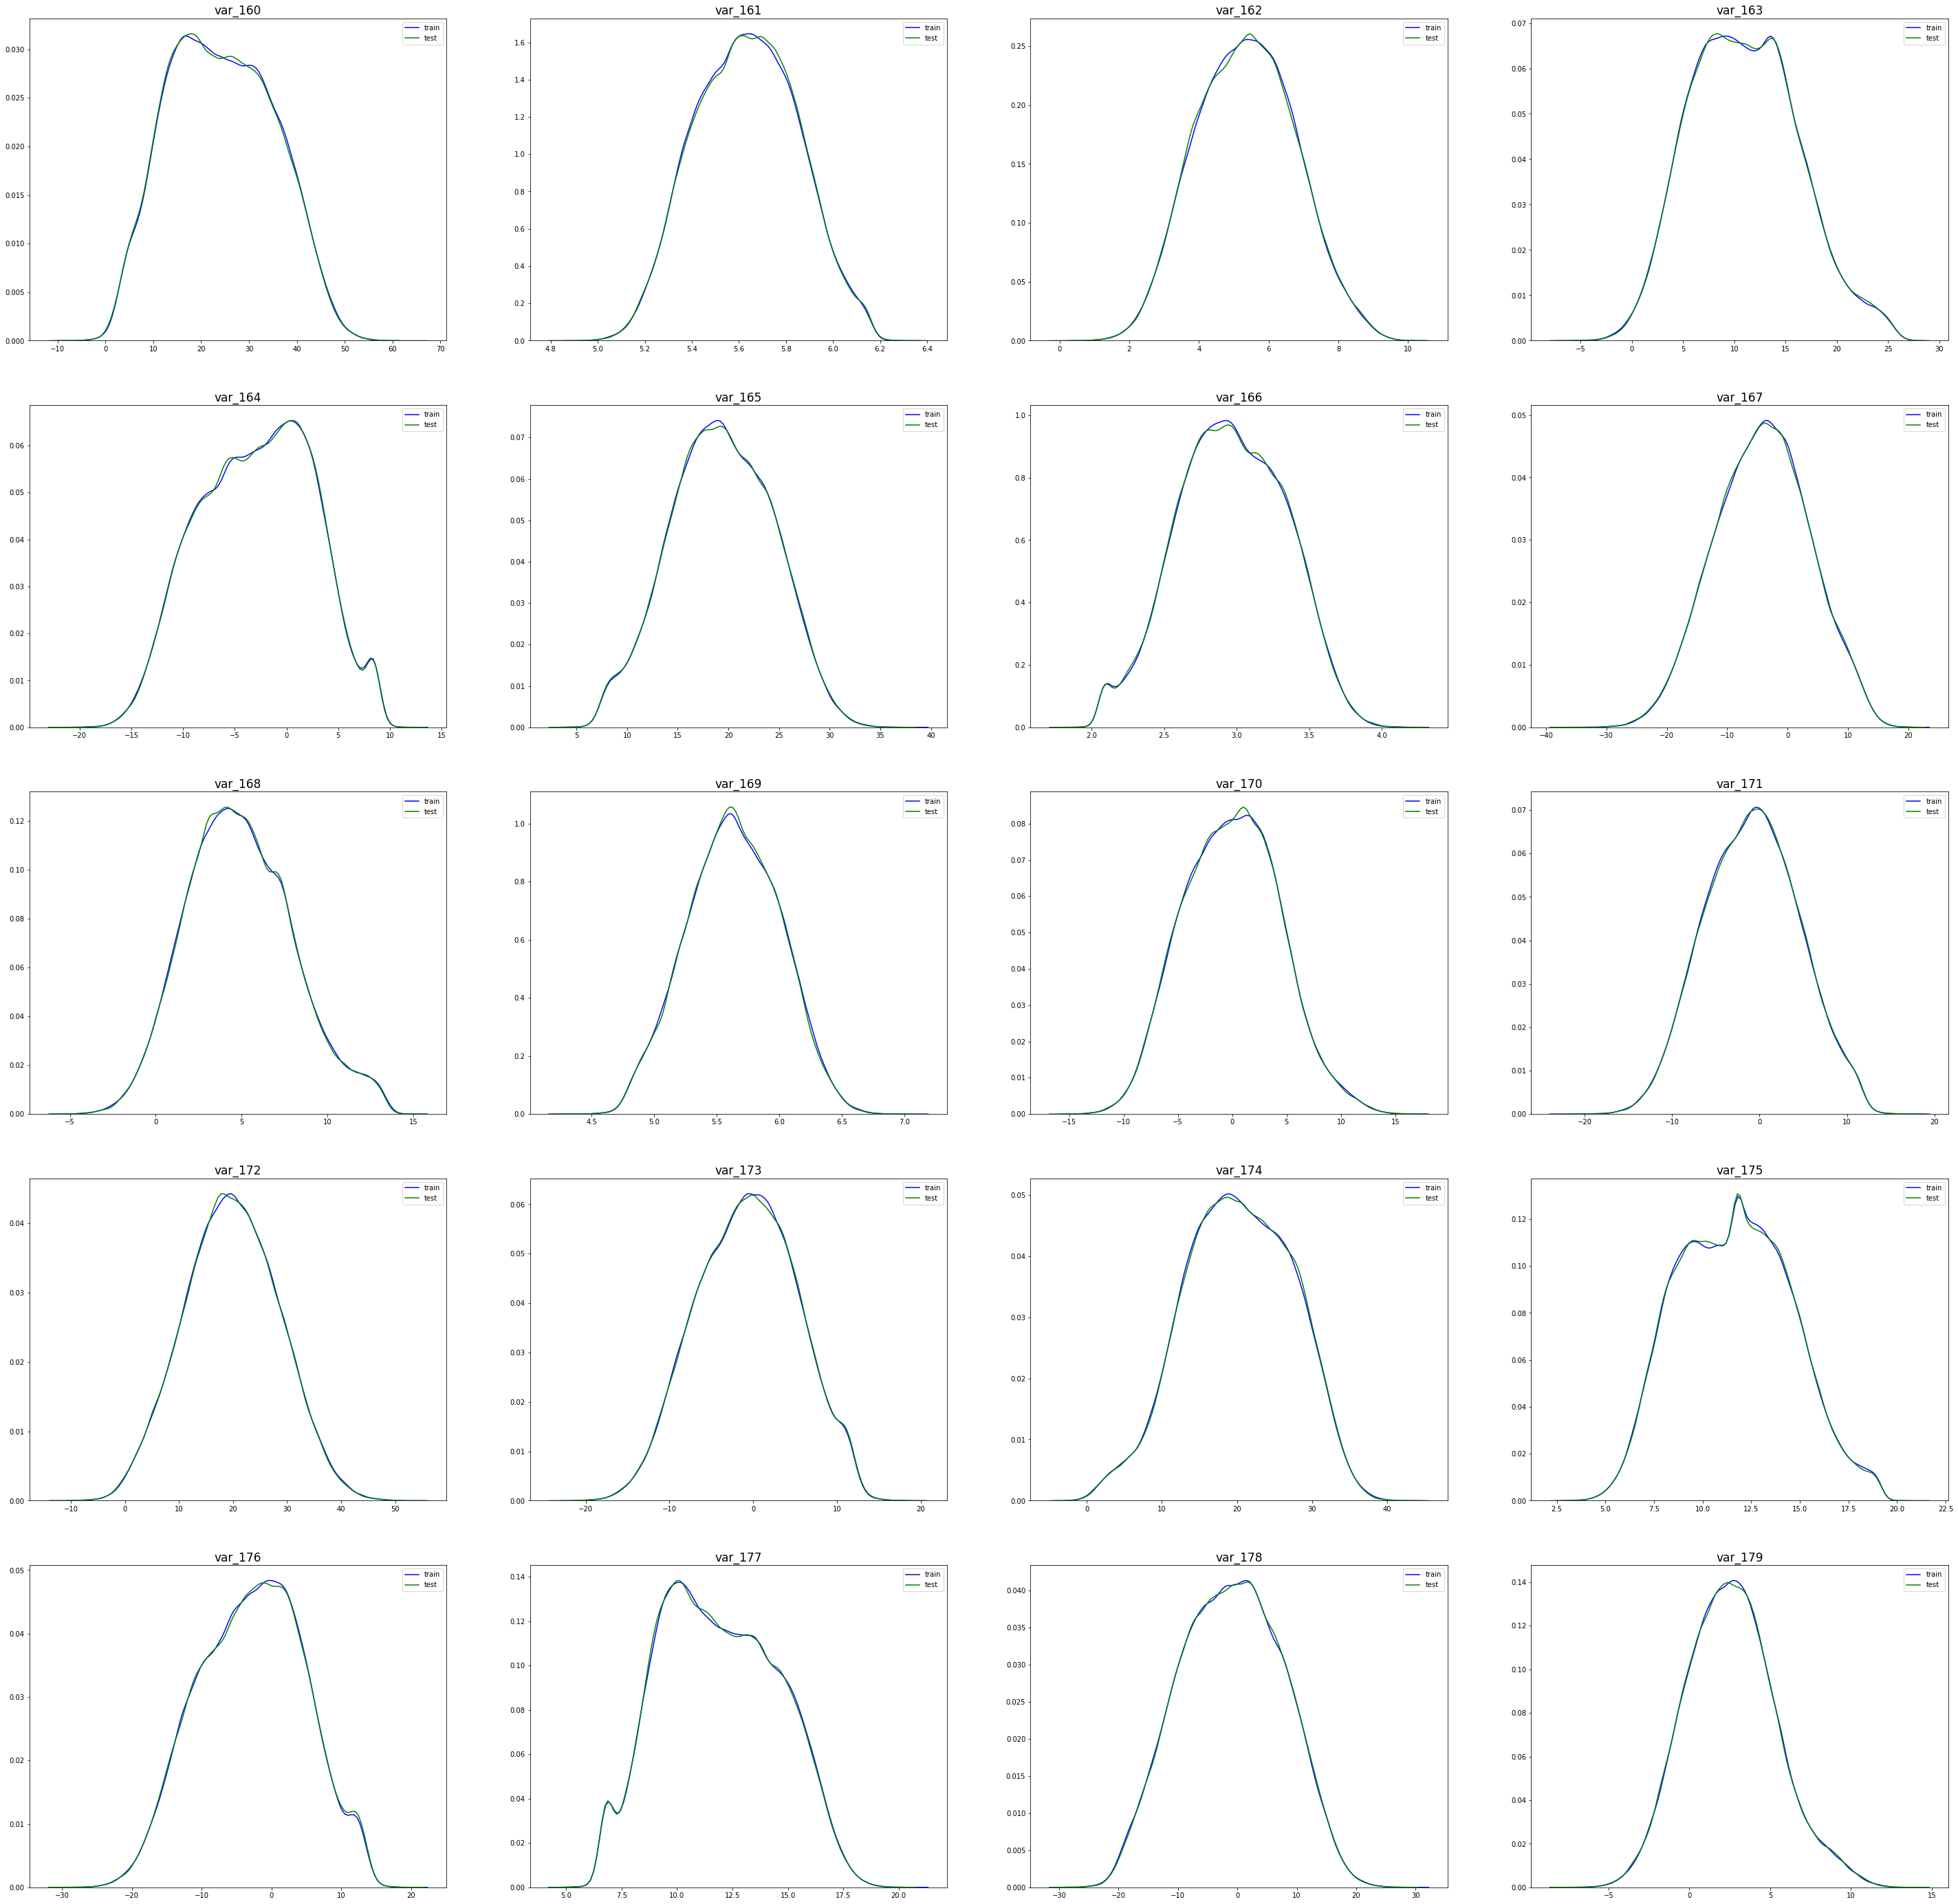

In [40]:
show_plot(continuous_feature[160:180], 5, 4)

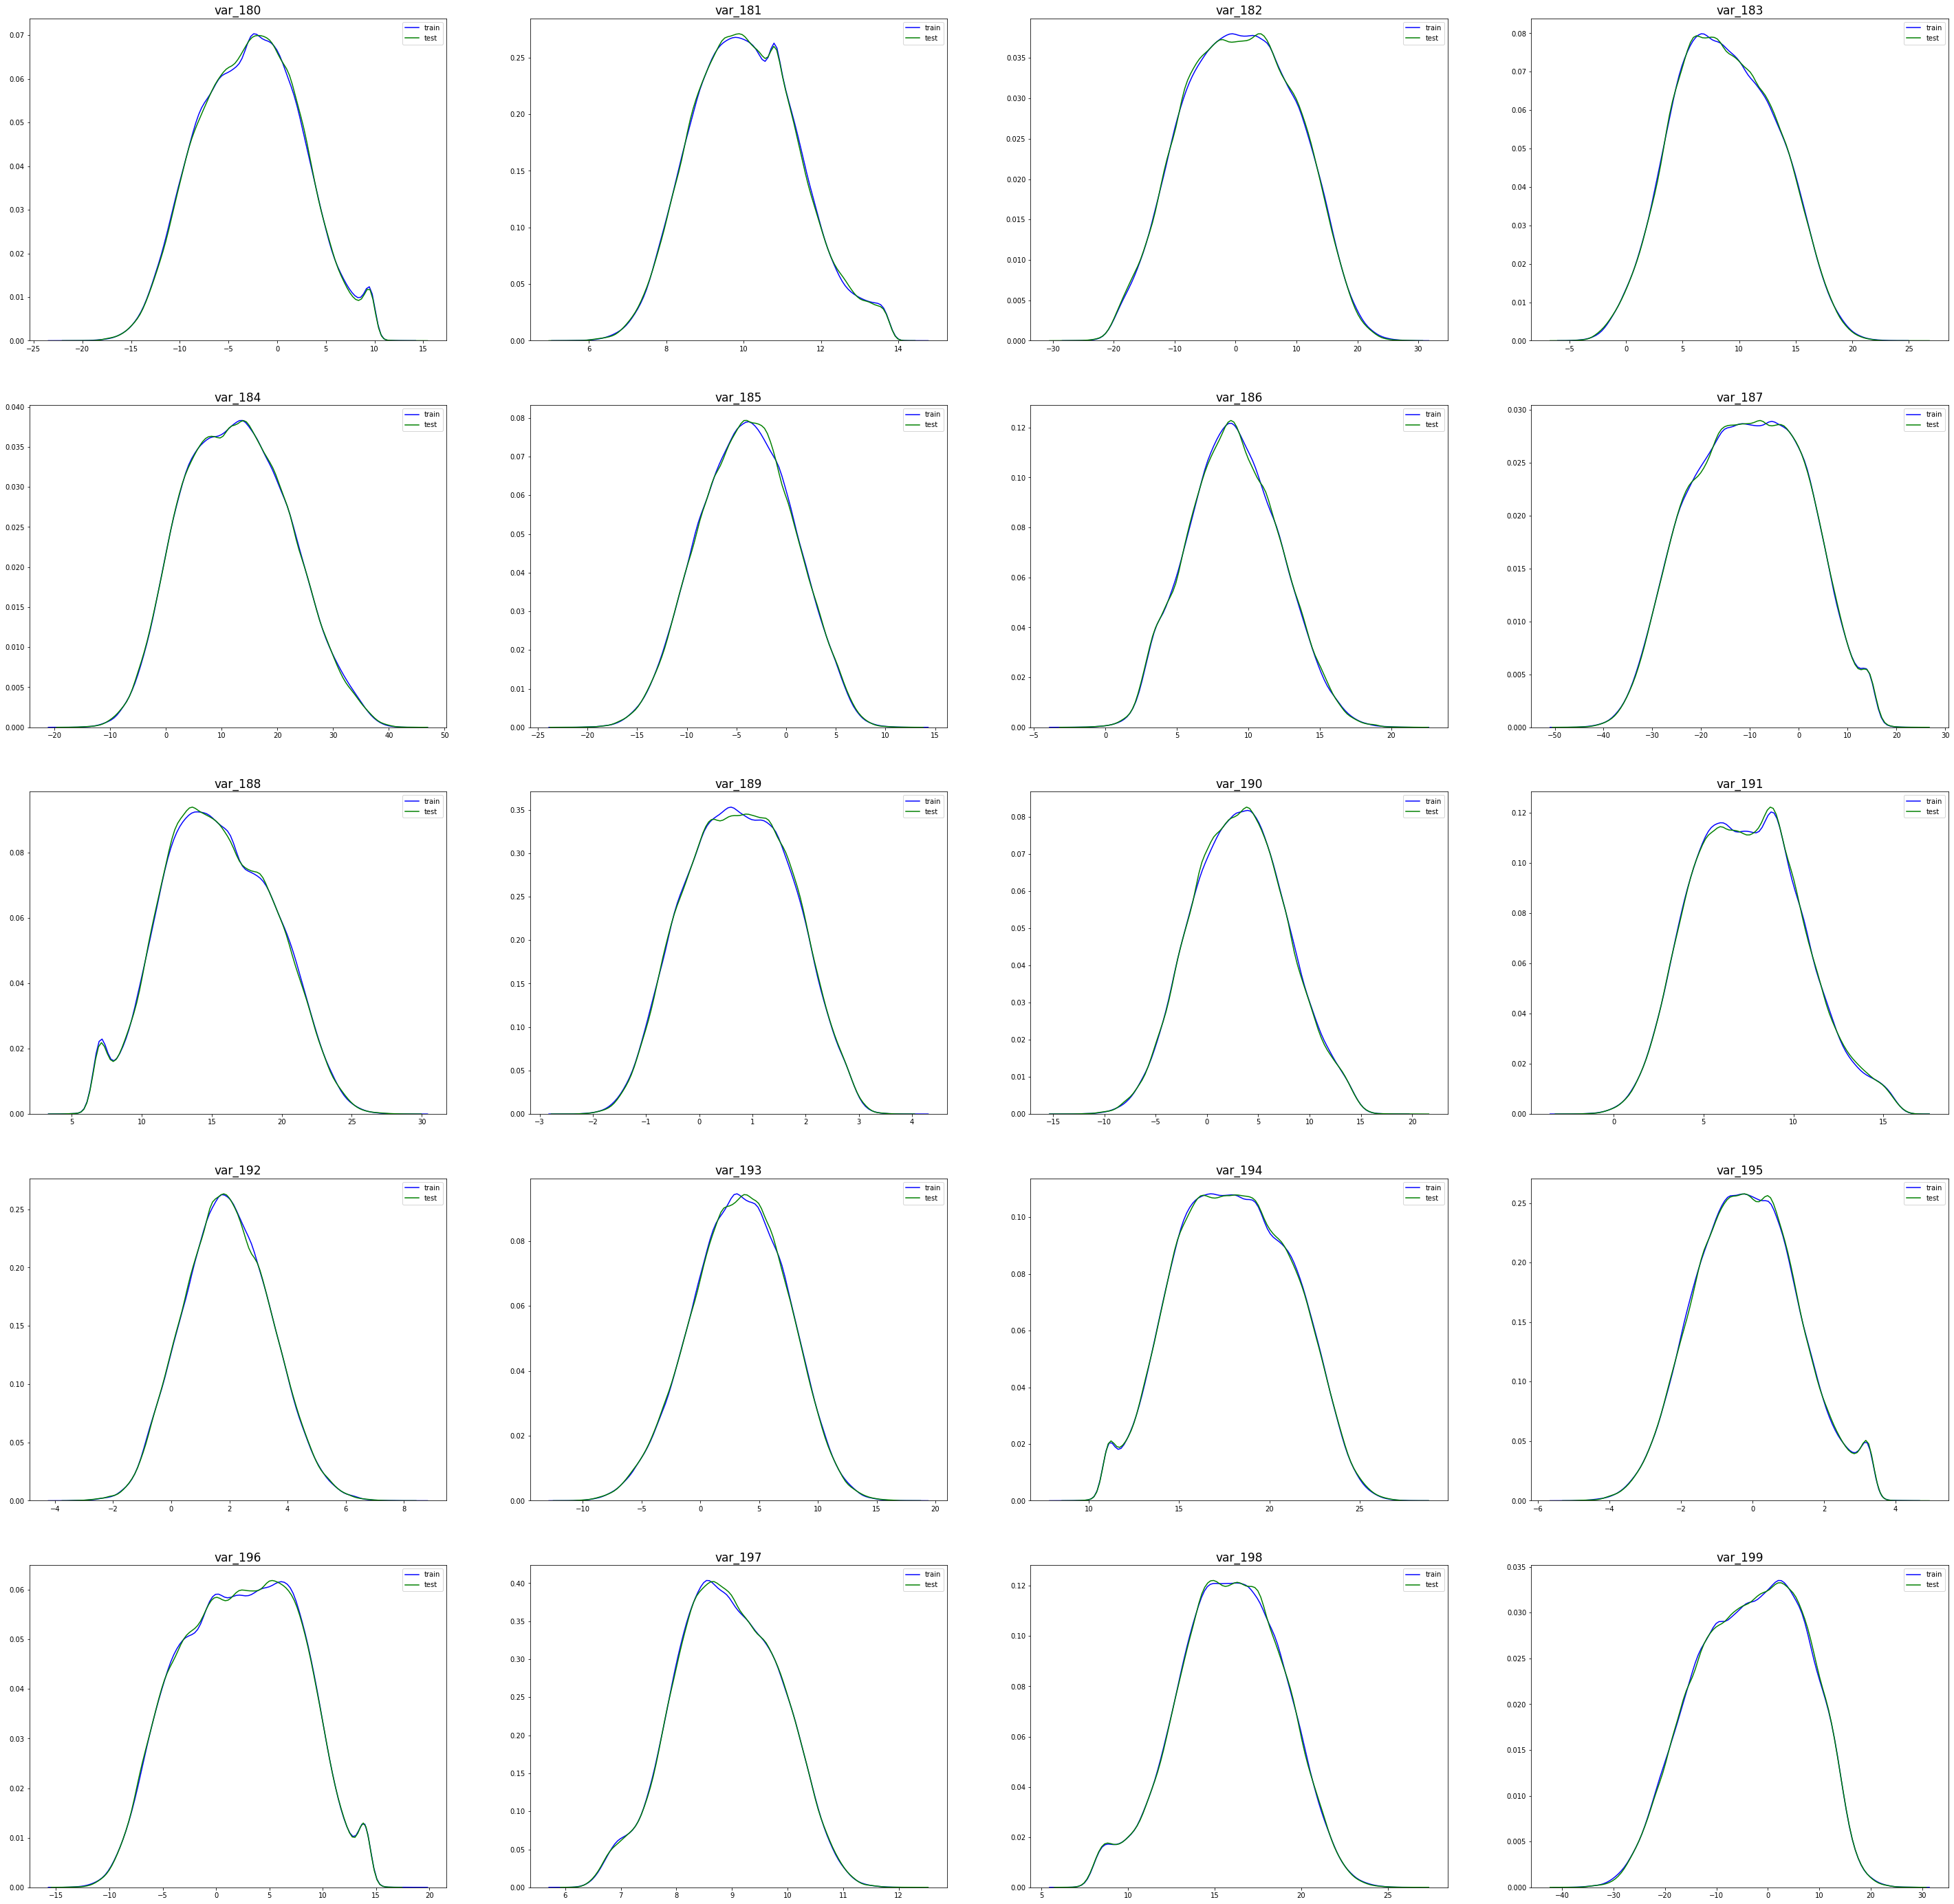

In [41]:
show_plot(continuous_feature[180:200], 5, 4)

In [47]:
# min_val = correlation.describe()[3:4].T.sort_values('min', ascending=False).head(10)
# min_val

In [48]:
# for val in min_val.index:
#     print(val , correlation.loc[correlation[val] == correlation[val].min()].index[0])

In [51]:
df_train.skew()

target     2.657642
var_0      0.235639
var_1      0.053115
var_2      0.260313
var_3     -0.003548
             ...   
var_195    0.124048
var_196   -0.032527
var_197   -0.031094
var_198   -0.170156
var_199   -0.164349
Length: 201, dtype: float64